# **Importing the Data**

In [1]:
import pandas as pd
Full_df = pd.read_csv("data.csv")

In [2]:
# import essential libraries
import os
import time
import numpy as np
from numpy import arange
from numpy import absolute
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pylab import * # For adjusting frame width only
from pprint import pprint
from scipy.interpolate import griddata
from itertools import cycle
from collections import defaultdict
from IPython.display import Image
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import uniform, randint, expon, loguniform
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict


# import models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn. gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import random as rn

In [3]:
Full_df

Powder Material Substrate Material  Beam Radius  P_input (W)  v_l (mm/s)  \
0              316L               316L          1.4          500        4.23   
1              316L               316L          1.4          500        4.23   
2              316L               316L          1.4          500        4.23   
3              316L               316L          1.4          500        4.23   
4              316L               316L          1.4          500        4.23   
..              ...                ...          ...          ...         ...   
319            316L               316L          1.4         1250       12.69   
320            316L               316L          1.4         1250       12.69   
321            316L               316L          1.4         1250       12.69   
322            316L               316L          1.4         1250       12.69   
323            316L               316L          1.4         1250       12.69   

     Pf_Ts (g/mm)   E(j/mm3)  Height (um)  Depth (um)  Width (um)  Area (um2)  \
0          0.0059  19.206309       121.41      220.53      810.39     58100.0   
1          0.0071  19.206309       142.96      243.99      836.94     65200.0   
2          0.0083  19.206309       163.01      271.87      879.53     72400.0   
3          0.0094  19.206309       181.97      288.32      909.04     79400.0   
4          0.0106  19.206309       199.70      304.77      936.84     85900.0   
..            ...        ...          ...         ...         ...         ...   
319        0.0071  16.005258       189.17      541.69     1457.92    263000.0   
320        0.0083  16.005258       215.68      569.45     1481.27    274000.0   
321        0.0094  16.005258       239.96      584.78     1509.91    285000.0   
322        0.0106  16.005258       263.44      609.76     1535.26    296000.0   
323        0.0118  16.005258       285.25      629.74     1559.99    306000.0   

     Contact angle  Max Temp  dilution     Meltpool_label  
0           147.40   2349.94      0.64  Undesirable Shape  
1           146.38   2415.41      0.63  Undesirable Shape  
2           144.68   2478.45      0.63  Undesirable Shape  
3           144.81   2538.46      0.61  Undesirable Shape  
4           142.97   2594.89      0.60  Undesirable Shape  
..             ...       ...       ...                ...  
319         157.92   4505.25      0.74  Undesirable Shape  
320         156.09   4612.45      0.73  Undesirable Shape  
321         154.43   4711.20      0.71  Undesirable Shape  
322         153.22   4810.17      0.70  Undesirable Shape  
323         151.04   4900.36      0.69  Undesirable Shape  

[324 rows x 15 columns]

## **Defining helper functions**

In [14]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [15]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

In [16]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [17]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [18]:
'''
Make frame thicker, make tick pointing inside, make tick thicker
default frame width is 2, default tick width is 1.5
'''
def frame_tick(frame_width = 2, tick_width = 1.5):
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(frame_width)
    plt.tick_params(direction = 'in', 
                    width = tick_width)

'''
legend:
default location : upper left
default fontsize: 8
Frame is always off
'''
def legend(location = 'upper left', fontsize = 8):
    plt.legend(loc = location, fontsize = fontsize, frameon = False)
    
'''
savefig:
bbox_inches is always tight
'''
def savefig(filename):
    plt.savefig(filename, bbox_inches = 'tight')
    
dpi = 300

---

---


# **Task 1: Regression**

---



---

## **Data splitting and preprocessing**

In [19]:
gk_df = Full_df.drop(columns=['Powder Material', 'Substrate Material', 'Beam Radius', 'Height (um)','Width (um)','Area (um2)','Contact angle', 'Max Temp', 'dilution', 'Meltpool_label'])
gk_df

P_input (W)  v_l (mm/s)  Pf_Ts (g/mm)   E(j/mm3)  Depth (um)
0            500        4.23        0.0059  19.206309      220.53
1            500        4.23        0.0071  19.206309      243.99
2            500        4.23        0.0083  19.206309      271.87
3            500        4.23        0.0094  19.206309      288.32
4            500        4.23        0.0106  19.206309      304.77
..           ...         ...           ...        ...         ...
319         1250       12.69        0.0071  16.005258      541.69
320         1250       12.69        0.0083  16.005258      569.45
321         1250       12.69        0.0094  16.005258      584.78
322         1250       12.69        0.0106  16.005258      609.76
323         1250       12.69        0.0118  16.005258      629.74

[324 rows x 5 columns]

In [20]:
X = gk_df.drop(["Depth (um)"], axis = 1)   #independent features
y = gk_df["Depth (um)"]                 #dependent features

In [21]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [22]:
#checking the shape of our train set and test set

print("Training set shape: {}".format(x_train.shape))
print("Test set shape: {}".format(x_test.shape))
print("Training label set shape: {}".format(y_train.shape))
print("Test label set shape: {}".format(y_test.shape))

Training set shape: (259, 4)
Test set shape: (65, 4)
Training label set shape: (259,)
Test label set shape: (65,)


In [23]:
# get a copy of y_test
y_test_real = y_test

scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## **Data Exploration**

Text(0, 0.5, 'Occurence')

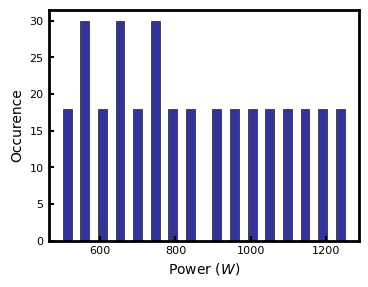

In [24]:
power=Full_df['P_input (W)']

fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plt.hist(power, edgecolor = 'k', linewidth = 0.5, bins = 32, color= 'navy', alpha = 0.8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
frame_tick()
plt.xlabel(r'Power ($W$)')
plt.ylabel(r'Occurence')

Text(0, 0.5, 'Occurence')

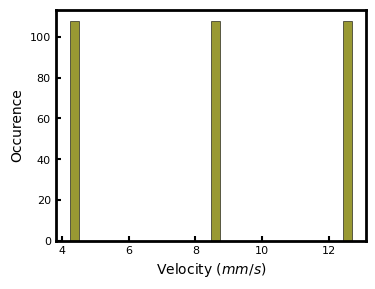

In [25]:
velociy=Full_df['v_l (mm/s)']

fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plt.hist(velociy, edgecolor = 'k', linewidth = 0.5, bins = 32, color= 'olive', alpha = 0.8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
frame_tick()
plt.xlabel(r'Velocity ($mm/s$)')
plt.ylabel(r'Occurence')

Text(0, 0.5, 'Occurrence')

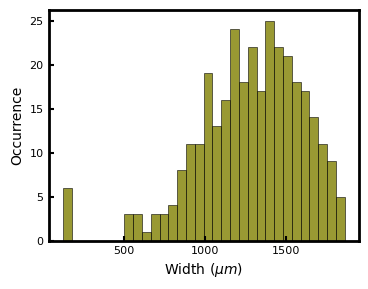

In [26]:
width=Full_df['Width (um)']

fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plt.hist(width, edgecolor = 'k', linewidth = 0.5, bins = 32, color= 'olive', alpha = 0.8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
frame_tick()
plt.xlabel(r'Width ($\mu m$)')
plt.ylabel(r'Occurrence')

Text(0, 0.5, 'Occurrence')

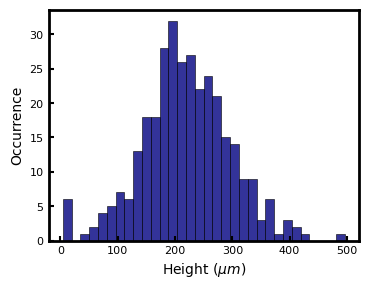

In [27]:
height=Full_df['Height (um)']

fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plt.hist(height, edgecolor = 'k', linewidth = 0.5, bins = 32, color= 'navy', alpha = 0.8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
frame_tick()
plt.xlabel(r'Height ($\mu m$)')
plt.ylabel(r'Occurrence')

Text(0, 0.5, 'Occurrence')

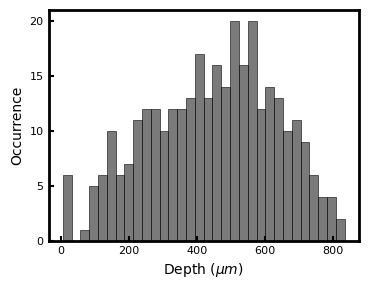

In [28]:
depth=Full_df['Depth (um)']

fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plt.hist(depth, edgecolor = 'k', linewidth = 0.5, bins = 32, color= '0.35', alpha = 0.8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
frame_tick()
plt.xlabel(r'Depth ($\mu m$)')
plt.ylabel(r'Occurrence')

Undesirable Shape    290
Desirable Shape       34
Name: Meltpool_label, dtype: int64
Index(['Undesirable Shape', 'Desirable Shape'], dtype='object')
[0 1]


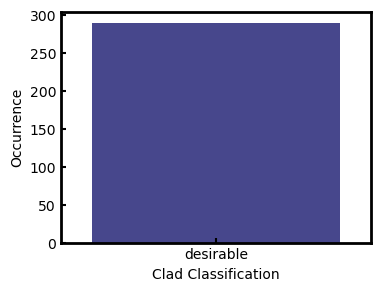

In [29]:
fig = plt.figure(figsize = (4,3), dpi = 100)

widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

classification = Full_df['Meltpool_label'].value_counts()
print(classification)

dir(classification)
print(classification.keys())

y_pos = np.arange(len(classification.keys()))
print(y_pos)

plt.xticks(y_pos, ['desirable', 'undesirable'])
plt.xlim(-0.5, np.max(y_pos)-0.5)
plt.bar(y_pos, classification,  color= ('midnightblue', 'olive'), alpha = 0.8)

plt.ylabel("Occurrence")
plt.xlabel("Clad Classification")
frame_tick()

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2113/77889812.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(clad)


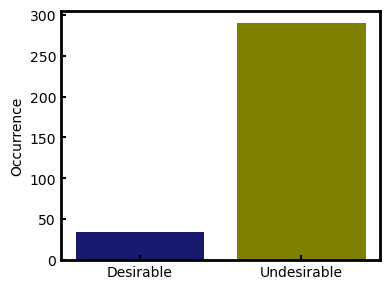

In [30]:
fig = plt.figure(figsize = (4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


clad = ("Desirable", "Undesirable")
occurance = (34, 290)
x_pos = np.arange(len(clad))

ax.bar(clad, occurance, color=['midnightblue', 'olive'])

ax.set_ylabel('Occurrence')
ax.set_xticklabels(clad)
plt.yticks()

fig.tight_layout()
plt.show()

## **Lasso Regression**

In [ ]:
from sklearn.utils.fixes import loguniform
# Lasso

Lasso = linear_model.Lasso(alpha = 0.0045)

# specify parameters and distributions to sample from
param_dist = {
    "alpha": loguniform(0.0005, 1)
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    Lasso, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [31]:
# LASSO

lasso = linear_model.Lasso(alpha=0.0045)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

Lasso_R2 = metrics.r2_score(y_test, y_test_predict)
Lasso_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)
lasso_metrics

R^2 training: 0.897, R^2 test: 0.886


LASSO
Root Mean Squared Error  60.261414
Mean Absolute Error      49.626692
R^2                       0.885989
Explained Variance        0.887052

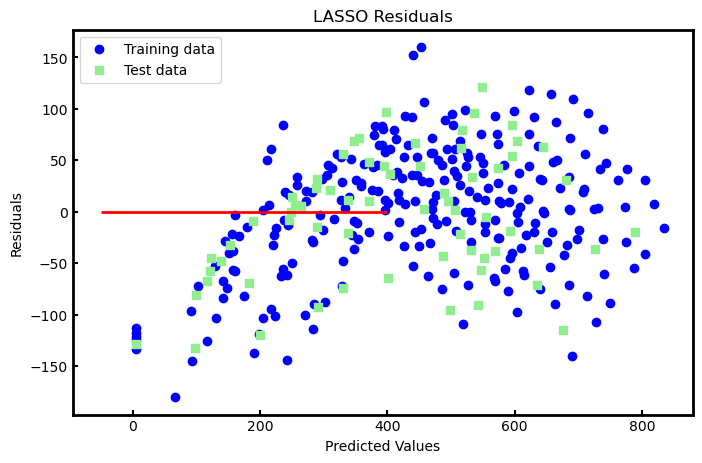

In [32]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('depth_fig/Lasso-Residual-1.png', dpi=600)

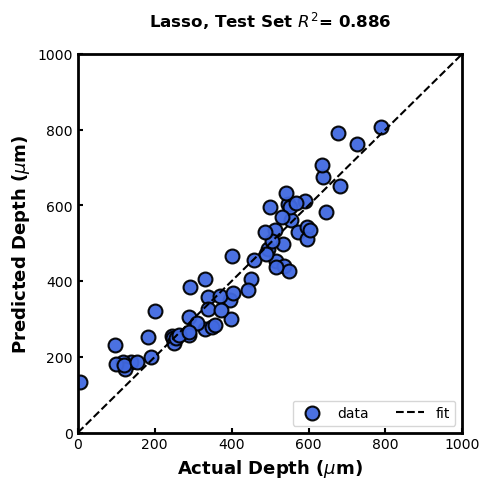

In [33]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('Lasso, Test Set $R^2$= ' + str('%.3f' % Lasso_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)



ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

##################

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

##################

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('depth_fig/R2-Lasso-fit.png', dpi=600)
plt.show()


[[285.44298197 287.38639311 289.32980424 ... 862.63608964 864.57950078
  866.52291192]
 [284.64739271 286.59080385 288.53421498 ... 861.84050038 863.78391152
  865.72732266]
 [283.85180345 285.79521459 287.73862573 ... 861.04491113 862.98832226
  864.9317334 ]
 ...
 [ 49.15297219  51.09638332  53.03979446 ... 626.34607986 628.289491
  630.23290213]
 [ 48.35738293  50.30079407  52.2442052  ... 625.5504906  627.49390174
  629.43731288]
 [ 47.56179367  49.50520481  51.44861594 ... 624.75490134 626.69831248
  628.64172362]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


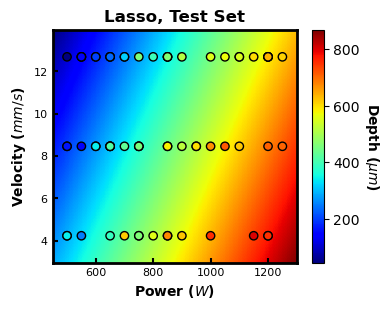

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


[[45.70700132 45.80343351 45.89986569 ... 74.34736076 74.44379295
  74.54022513]
 [45.70598712 45.80241931 45.89885149 ... 74.34634656 74.44277875
  74.53921093]
 [45.70497292 45.80140511 45.89783729 ... 74.34533236 74.44176455
  74.53819673]
 ...
 [45.40578419 45.50221638 45.59864857 ... 74.04614363 74.14257582
  74.23900801]
 [45.40476999 45.50120218 45.59763437 ... 74.04512943 74.14156162
  74.23799381]
 [45.4037558  45.50018798 45.59662017 ... 74.04411524 74.14054742
  74.23697961]]


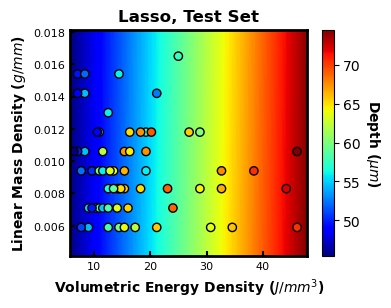

In [34]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

lasso.fit(x_test.iloc[:,:2], y_test)
W = lasso.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('Lasso, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()


# Energy density vs. Pf/Ts

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

xs = np.linspace(0.9*np.min(x_test.iloc[:,3]), 1.04*np.max(x_test.iloc[:,3]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,2]), 1.1*np.max(x_test.iloc[:,2]), ny)
xx, yy = np.meshgrid(xs, ys)

lasso.fit(x_test.iloc[:,:2], y_test)
W = lasso.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Linear Mass Density ($g/mm$)', weight='bold')
plt.xlabel(r'Volumetric Energy Density ($J/mm^3$)', weight='bold')
plt.tight_layout()
plt.title('Lasso, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,3], x_test.iloc[:,2], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Ridge Regression**

In [ ]:
# Ridge

Ridge = linear_model.Ridge(alpha = 0.001)

# specify parameters and distributions to sample from
param_dist = {
    "alpha": loguniform(0.0005, 1)
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    Ridge, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [35]:
# Ridge

Ridge = linear_model.Ridge(alpha=0.012)
Ridge.fit(X_train, y_train)

y_test_predict = Ridge.predict(X_test)
y_train_predict = Ridge.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

Ridge_R2 = metrics.r2_score(y_test, y_test_predict)
Ridge_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

Ridge_metrics = get_regression_metrics('Ridge', y_test, y_test_predict)
Ridge_metrics

R^2 training: 0.897, R^2 test: 0.886


Ridge
Root Mean Squared Error  60.272139
Mean Absolute Error      49.633405
R^2                       0.885948
Explained Variance        0.887013

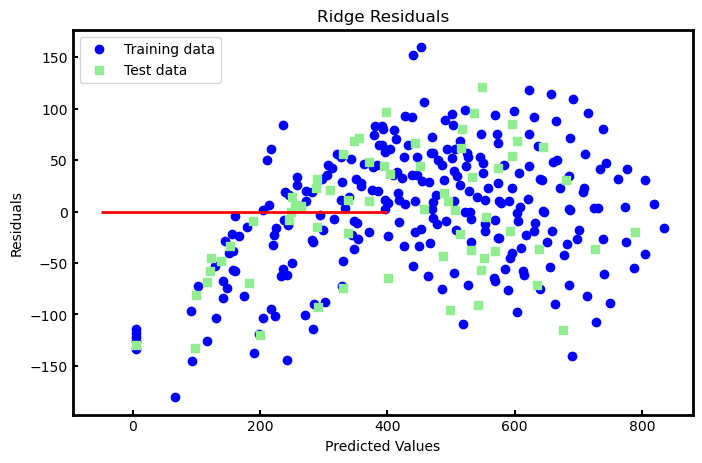

In [36]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Ridge', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('Ridge-Residual-1.png', dpi=600)

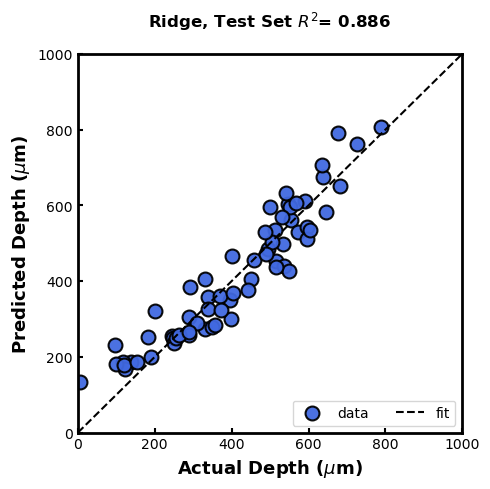

In [37]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('Ridge, Test Set $R^2$= ' + str('%.3f' % Ridge_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)
##############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Ridge Predicted Width ($\mu$m)', weight='bold', fontsize=13)

##############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('depth_fig/R2-Ridge-fit.png', dpi=600)
plt.show()


[[285.44322627 287.38663779 289.33004931 ... 862.63644651 864.57985803
  866.52326955]
 [284.64763529 286.5910468  288.53445832 ... 861.84085553 863.78426704
  865.72767856]
 [283.8520443  285.79545582 287.73886733 ... 861.04526454 862.98867606
  864.93208758]
 ...
 [ 49.15270355  51.09611507  53.03952658 ... 626.34592379 628.28933531
  630.23274682]
 [ 48.35711256  50.30052408  52.2439356  ... 625.55033281 627.49374432
  629.43715584]
 [ 47.56152158  49.5049331   51.44834461 ... 624.75474182 626.69815334
  628.64156485]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


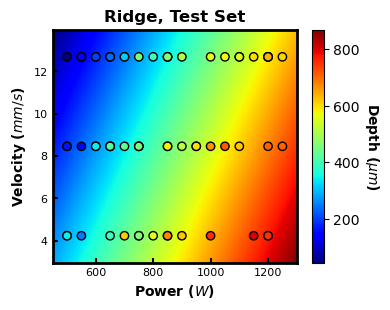

In [51]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

Ridge.fit(x_test.iloc[:,:2], y_test)
W = Ridge.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('Ridge, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Polynomial Regression**

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

Poly_R2 = metrics.r2_score(y_test, y_test_predict)
Poly_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.984, R^2 test: 0.964


Polynomial Regression
Root Mean Squared Error              33.878568
Mean Absolute Error                  23.312558
R^2                                   0.963965
Explained Variance                    0.963984

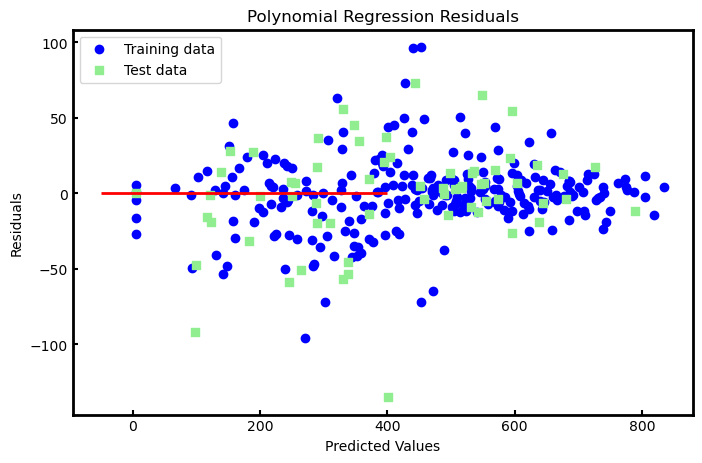

In [44]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('Poly-Residual-1.png', dpi=600)

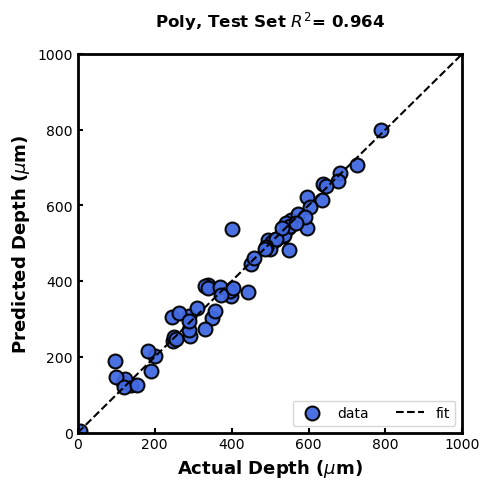

In [45]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('Poly, Test Set $R^2$= ' + str('%.3f' % Poly_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#################

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#################

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-Poly-fit.png', dpi=600)
plt.show()


[[285.44538368 287.38879628 289.33220888 ... 862.63892542 864.58233802
  866.52575061]
 [284.64977922 286.59319181 288.53660441 ... 861.84332095 863.78673355
  865.73014615]
 [283.85417475 285.79758735 287.74099994 ... 861.04771648 862.99112908
  864.93454168]
 ...
 [ 49.15085677  51.09426937  53.03768197 ... 626.34439851 628.28781111
  630.2312237 ]
 [ 48.35525231  50.2986649   52.2420775  ... 625.54879404 627.49220664
  629.43561924]
 [ 47.55964784  49.50306044  51.44647303 ... 624.75318957 626.69660217
  628.64001477]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


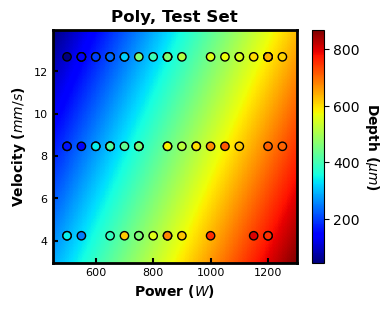

In [52]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

polyreg.fit(x_test.iloc[:,:2], y_test)
W = polyreg.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('Poly, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Decision Tree Regressor**

In [ ]:
# Decision Tree Reg
DTR = DecisionTreeRegressor(max_depth=12, max_features=4, random_state=1)

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# specify parameters and distributions to sample from
param_dist = {
    'max_depth': max_depth, 
    'max_features': max_features,
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split':[2, 5, 10]
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    DTR, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [39]:
#try Decision Tree regressor

DTR = DecisionTreeRegressor(max_depth= 60, max_features='sqrt', min_samples_split=2, min_samples_leaf=1, random_state=1)
DTR.fit(X_train, y_train)

y_test_predict = DTR.predict(X_test)
y_train_predict = DTR.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

DTR_R2 = metrics.r2_score(y_test, y_test_predict)
DTR_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

DTR_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
DTR_metrics

R^2 training: 1.000, R^2 test: 0.927


Decision Tree Regression
Root Mean Squared Error                 48.176422
Mean Absolute Error                     32.616462
R^2                                      0.927132
Explained Variance                       0.929809

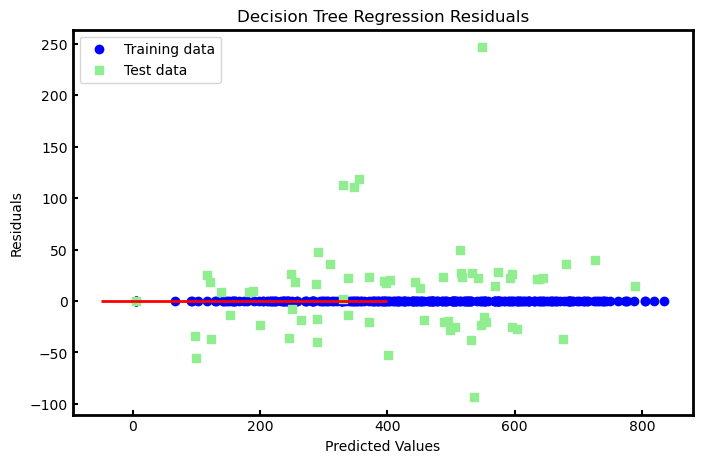

In [40]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('DT-Residual-1.png', dpi=600)

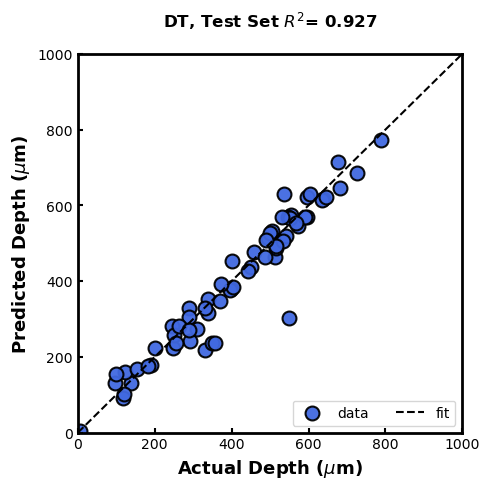

In [41]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('DT, Test Set $R^2$= ' + str('%.3f' % DTR_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

##################

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

##################

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-DT-fit.png', dpi=600)
plt.show()


[[309.125 309.125 309.125 ... 732.36  732.36  732.36 ]
 [309.125 309.125 309.125 ... 732.36  732.36  732.36 ]
 [309.125 309.125 309.125 ... 732.36  732.36  732.36 ]
 ...
 [  5.31    5.31    5.31  ... 541.69  541.69  541.69 ]
 [  5.31    5.31    5.31  ... 541.69  541.69  541.69 ]
 [  5.31    5.31    5.31  ... 541.69  541.69  541.69 ]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


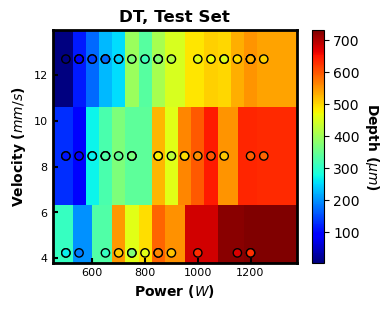

In [53]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

DTR.fit(x_test.iloc[:,:2], y_test)
W = DTR.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('DT, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()


## **Random Forest Regression**

In [ ]:
# Random Forest Reg
RF = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1)

# specify parameters and distributions to sample from

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_dist = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    RF, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [47]:
# Random Forest

RF = RandomForestRegressor(n_estimators=1783, min_samples_split=5, min_samples_leaf=1, max_features= 'sqrt', max_depth=10, bootstrap= False, random_state=1)

RF.fit(X_train, y_train)

y_test_predict = RF.predict(X_test)
y_train_predict = RF.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

RF_R2 = metrics.r2_score(y_test, y_test_predict)
RF_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

RF_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
RF_metrics

R^2 training: 0.995, R^2 test: 0.972


Random Forest Regression
Root Mean Squared Error                 29.983217
Mean Absolute Error                     23.437568
R^2                                      0.971776
Explained Variance                       0.971778

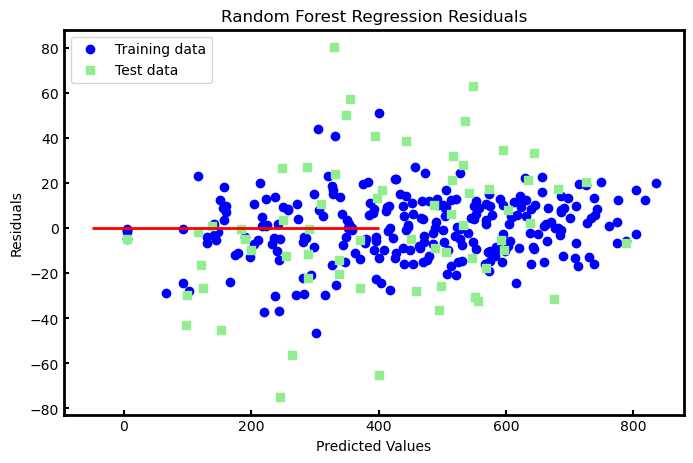

In [48]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('RF-Residual-1.png', dpi=600)

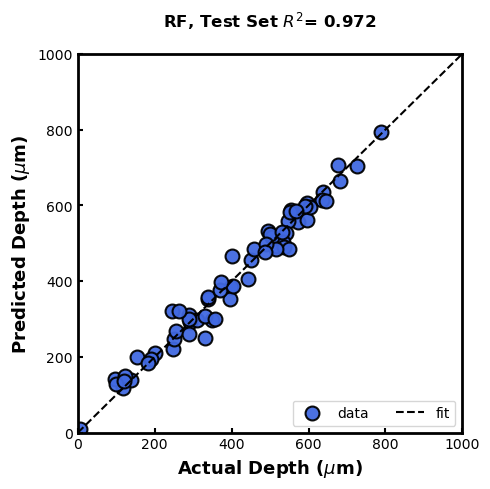

In [49]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('RF, Test Set $R^2$= ' + str('%.3f' % RF_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-RF-fit.png', dpi=600)
plt.show()


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[[282.86047953 282.86047953 282.86047953 ... 706.45858665 706.45858665
  706.45858665]
 [282.86047953 282.86047953 282.86047953 ... 706.45858665 706.45858665
  706.45858665]
 [282.86047953 282.86047953 282.86047953 ... 706.45858665 706.45858665
  706.45858665]
 ...
 [ 50.14845906  50.14845906  50.14845906 ... 546.8558525  546.8558525
  546.8558525 ]
 [ 50.14845906  50.14845906  50.14845906 ... 546.8558525  546.8558525
  546.8558525 ]
 [ 50.14845906  50.14845906  50.14845906 ... 546.8558525  546.8558525
  546.8558525 ]]


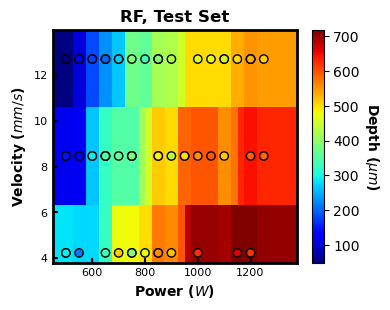

In [54]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

RF.fit(x_test.iloc[:,:2], y_test)
W = RF.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('RF, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **AdaBoost Regression**

In [ ]:
# AdaBoost Reg
AB = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='square', random_state=1)

# specify parameters and distributions to sample from
# Number of trees in Adaboost regressor
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]

param_dist = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'loss': ['linear', 'square', 'exponential']
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    AB, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [55]:
# AdaBoost

AB = AdaBoostRegressor(n_estimators=50, learning_rate=1, loss='square', random_state=1)

AB.fit(X_train, y_train)

y_test_predict = AB.predict(X_test)
y_train_predict = AB.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

AB_R2 = metrics.r2_score(y_test, y_test_predict)
AB_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

AB_metrics = get_regression_metrics('AdaBoost Regression', y_test, y_test_predict)
AB_metrics

R^2 training: 0.959, R^2 test: 0.945


AdaBoost Regression
Root Mean Squared Error            41.892503
Mean Absolute Error                32.754796
R^2                                 0.944901
Explained Variance                  0.946579

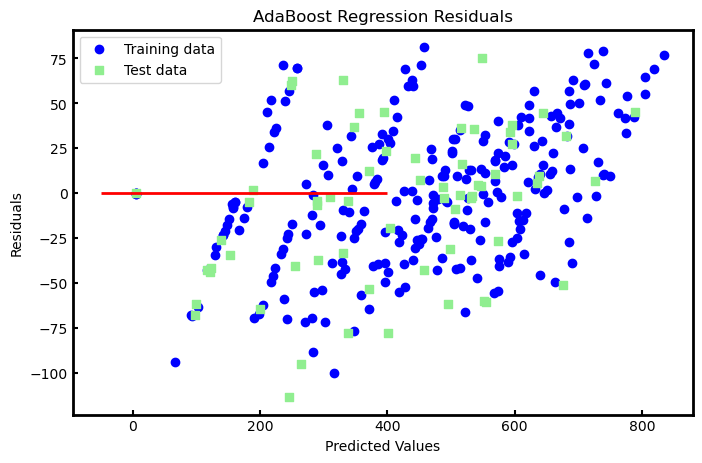

In [56]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('AdaBoost Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('AB-Residual-1.png', dpi=600)

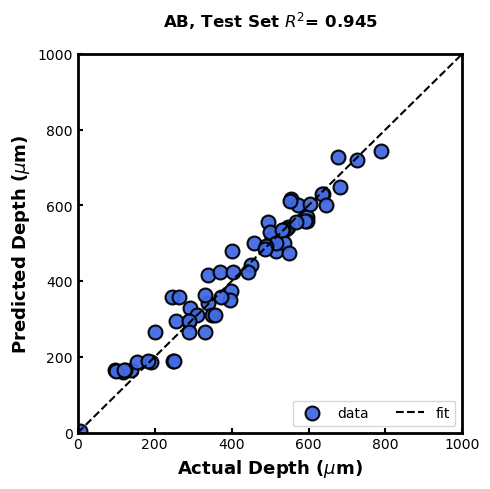

In [57]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('AB, Test Set $R^2$= ' + str('%.3f' % AB_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-AB-fit.png', dpi=600)
plt.show()


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


[[297.5725   297.5725   297.5725   ... 734.74     734.74     734.74    ]
 [297.5725   297.5725   297.5725   ... 734.74     734.74     734.74    ]
 [297.5725   297.5725   297.5725   ... 734.74     734.74     734.74    ]
 ...
 [ 64.624375  64.624375  64.624375 ... 534.85     534.85     534.85    ]
 [ 64.624375  64.624375  64.624375 ... 534.85     534.85     534.85    ]
 [ 64.624375  64.624375  64.624375 ... 534.85     534.85     534.85    ]]


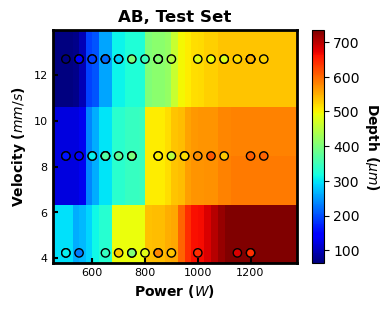

In [58]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

AB.fit(x_test.iloc[:,:2], y_test)
W = AB.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('AB, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Gradient Boosting Regressor**

In [ ]:
# Gradient Boosting Reg
GBR = GradientBoostingRegressor(n_estimators=916, learning_rate=0.01, max_features='sqrt', max_depth=60, min_samples_split=5, min_samples_leaf=4, random_state=1)

# specify parameters and distributions to sample from
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


param_dist = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    GBR, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [59]:
# Gradient Boosting Regressor

GBR = GradientBoostingRegressor(n_estimators=916, learning_rate=0.01, max_features='sqrt',
                                max_depth=100, min_samples_split=2, min_samples_leaf=1, random_state=1)

GBR.fit(X_train, y_train)

y_test_predict = GBR.predict(X_test)
y_train_predict = GBR.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

GBR_R2 = metrics.r2_score(y_test, y_test_predict)
GBR_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

GBR_metrics = get_regression_metrics('Gradient Boosting Regression', y_test, y_test_predict)
GBR_metrics

R^2 training: 1.000, R^2 test: 0.981


Gradient Boosting Regression
Root Mean Squared Error                     24.846820
Mean Absolute Error                         20.058478
R^2                                          0.980617
Explained Variance                           0.980959

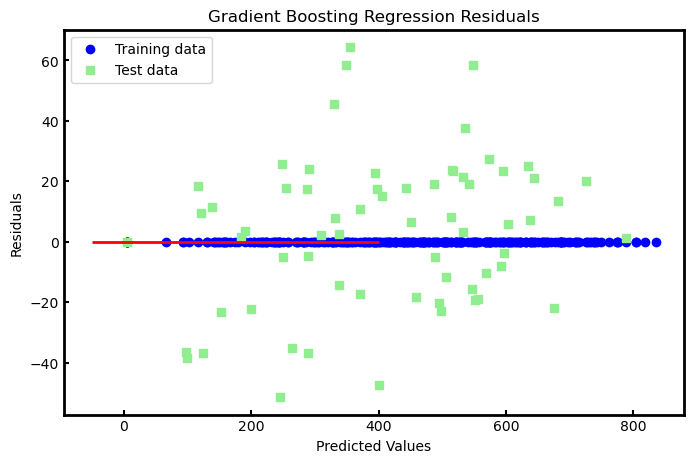

In [60]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Gradient Boosting Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('GBR-Residual-1.png', dpi=600)

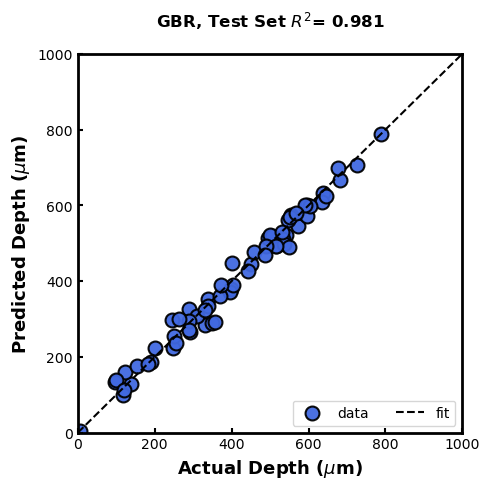

In [61]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('GBR, Test Set $R^2$= ' + str('%.3f' % GBR_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-GBR-fit.png', dpi=600)
plt.show()


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


[[309.13501605 309.13501605 309.13501605 ... 719.99664816 719.99664816
  719.99664816]
 [309.13501605 309.13501605 309.13501605 ... 719.99664816 719.99664816
  719.99664816]
 [309.13501605 309.13501605 309.13501605 ... 719.99664816 719.99664816
  719.99664816]
 ...
 [  5.35052642   5.35052642   5.35052642 ... 541.6766609  541.6766609
  541.6766609 ]
 [  5.35052642   5.35052642   5.35052642 ... 541.6766609  541.6766609
  541.6766609 ]
 [  5.35052642   5.35052642   5.35052642 ... 541.6766609  541.6766609
  541.6766609 ]]


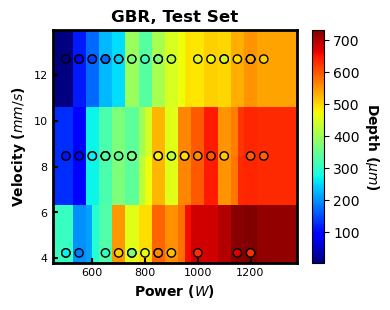

In [62]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

GBR.fit(x_test.iloc[:,:2], y_test)
W = GBR.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('GBR, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Support Vector Regressor**

In [ ]:
# Support Vector Reg
SVR = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

# specify parameters and distributions to sample from
# list of C values
C_range = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 50)]
gamma = np.logspace['scale', 'auto']

param_dist = {
    'C': C_range,
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': gamma
}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(
    SVR, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [63]:
# Support Vector Regressor
from sklearn.svm import SVR

SVR = SVR(kernel="rbf", C=290, gamma='scale', epsilon=0.1)

SVR.fit(X_train, y_train)

y_test_predict = SVR.predict(X_test)
y_train_predict = SVR.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

SVR_R2 = metrics.r2_score(y_test, y_test_predict)
SVR_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

SVR_metrics = get_regression_metrics('Support Vector Regression', y_test, y_test_predict)
SVR_metrics

R^2 training: 0.963, R^2 test: 0.955


Support Vector Regression
Root Mean Squared Error                  38.021485
Mean Absolute Error                      22.152095
R^2                                       0.954613
Explained Variance                        0.954973

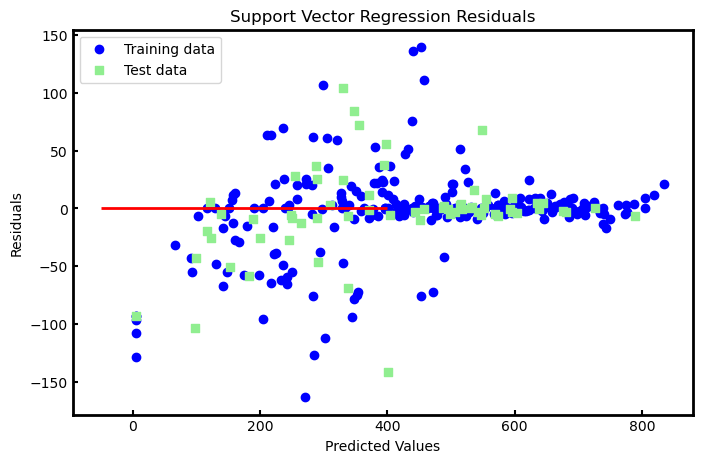

In [64]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Support Vector Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('SVR-Residual-1.png', dpi=600)

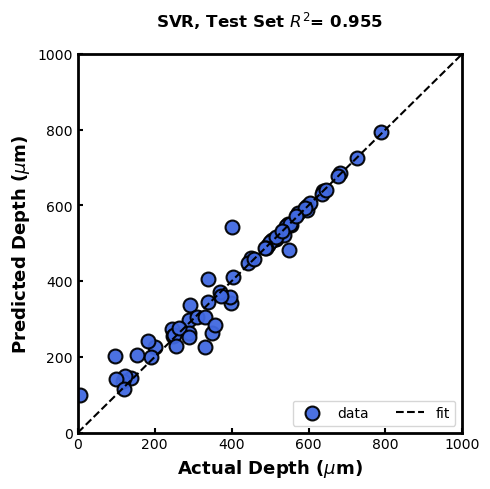

In [65]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('SVR, Test Set $R^2$= ' + str('%.3f' % SVR_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

################

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicte Width ($\mu$m)', weight='bold', fontsize=13)

################

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-SVR-fit.png', dpi=600)
plt.show()


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[[107.59894178 109.88896082 112.20265686 ... 525.4426379  524.37371387
  523.29936095]
 [107.59339756 109.88339446 112.19706849 ... 525.43897158 524.37007201
  523.29574352]
 [107.58785452 109.87782926 112.19148127 ... 525.43530396 524.36642885
  523.29212479]
 ...
 [106.00411769 108.2869657  110.59352237 ... 524.29689078 523.23550914
  522.1686909 ]
 [105.99892493 108.28174678 110.58827739 ... 524.29284135 523.23148604
  522.16469411]
 [105.99373337 108.27652905 110.58303357 ... 524.28879064 523.22746167
  522.16069605]]


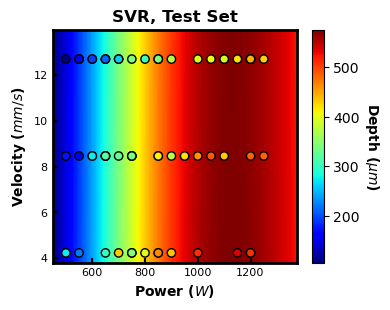

In [66]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

SVR.fit(x_test.iloc[:,:2], y_test)
W = SVR.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('SVR, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Gaussian Process Regression**

In [ ]:
# Gaussian Process Reg
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel
kernel = [((ConstantKernel() * RBF() + WhiteKernel()) + (ConstantKernel() * RBF() + WhiteKernel())),
          ((ConstantKernel()+RBF())+(ConstantKernel()+RBF())),
          ((ExpSineSquared())+(ExpSineSquared()))
          ]

GPR = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer='fmin_l_bfgs_b', random_state=1)

# specify parameters and distributions to sample from

param_dist = {
    'kernel': kernel,
    'alpha': [1e-2, 1e-3]
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    GPR, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [67]:
# Gaussian Process Regressor
#kernel = ConstantKernel(1.0, (1e-1, 1e3))*RBF(1.0, (1e-3, 1e3))
kernel = 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1)
#kernel = 1**2 * RBF(length_scale=1) + 1**2 * RBF(length_scale=1)

GPR = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10, alpha = 0.01, normalize_y = True, random_state=1)

GPR.fit(X_train, y_train)

y_test_predict = GPR.predict(X_test)
y_train_predict = GPR.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

GPR_R2 = metrics.r2_score(y_test, y_test_predict)
GPR_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

GPR_metrics = get_regression_metrics('Gaussian Process Regression', y_test, y_test_predict)
GPR_metrics

R^2 training: 0.964, R^2 test: 0.957


Gaussian Process Regression
Root Mean Squared Error                    36.877727
Mean Absolute Error                        24.871792
R^2                                         0.957303
Explained Variance                          0.957311

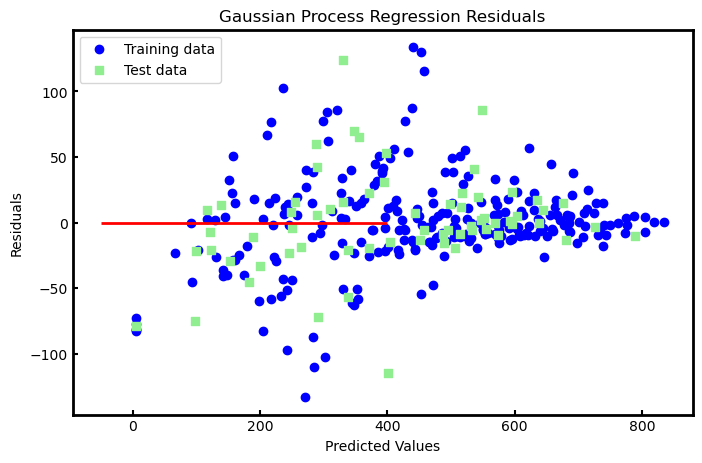

In [68]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Gaussian Process Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('GPR-Residual-1.png', dpi=600)

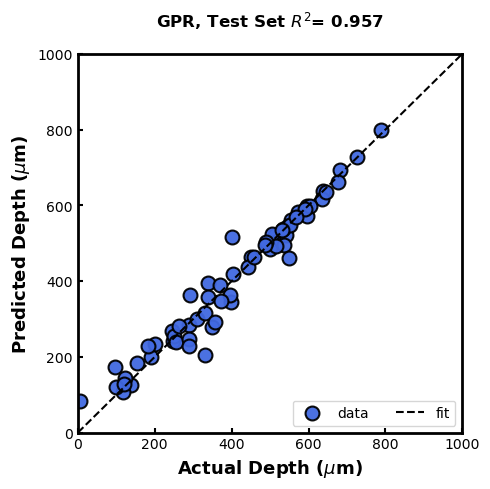

In [69]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('GPR, Test Set $R^2$= ' + str('%.3f' % GPR_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)



ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

##############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

##############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-GPR-fit.png', dpi=600)
plt.show()


[[167.70517193 171.76322512 175.8078486  ... 730.75724334 730.34692005
  729.92058697]
 [167.01800671 171.07602531 175.1206146  ... 730.07450135 729.66424232
  729.23797383]
 [166.33084136 170.3888255  174.43338065 ... 729.39175927 728.98156454
  728.55536067]
 ...
 [-36.38203677 -32.33424012 -28.29977441 ... 527.98227192 527.59104448
  527.18390401]
 [-37.06919425 -33.02143214 -28.98700066 ... 527.29952771 526.90836445
  526.50128865]
 [-37.75635164 -33.70862416 -29.6742269  ... 526.61678356 526.22568458
  525.81867334]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


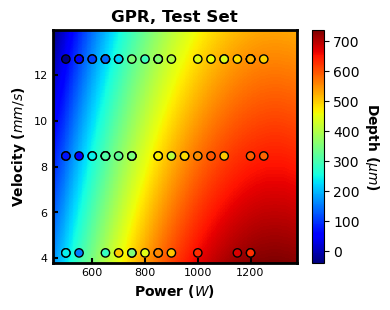

In [70]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

GPR.fit(x_test.iloc[:,:2], y_test)
W = GPR.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('GPR, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **KNearest Neighbor Regressor**

In [ ]:
# KNearest Neighbor Reg
KNNr = neighbors.KNeighborsRegressor(n_neighbors=5, weights = 'distance', algorithm='auto', metric='minkowski')

# specify parameters and distributions to sample from
# list of C values
neighbors_range = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
leafsize_range = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

param_dist = {
    'n_neighbors': neighbors_range,
    'weights': ['distance', 'uniform'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'],
    'leaf_size': leafsize_range,
    'metric': ['minkowski','euclidean','manhattan']
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    KNNr, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

In [71]:
KNNr = neighbors.KNeighborsRegressor(n_neighbors=10, leaf_size=560, weights = 'distance', algorithm='brute', metric='manhattan')

KNNr.fit(X_train, y_train)

y_test_predict = KNNr.predict(X_test)
y_train_predict = KNNr.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

KNNr_R2 = metrics.r2_score(y_test, y_test_predict)
KNNr_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

KNNr_metrics = get_regression_metrics('KNeighbors Regression', y_test, y_test_predict)
KNNr_metrics


R^2 training: 1.000, R^2 test: 0.945


KNeighbors Regression
Root Mean Squared Error              41.977961
Mean Absolute Error                  28.042401
R^2                                   0.944676
Explained Variance                    0.946687

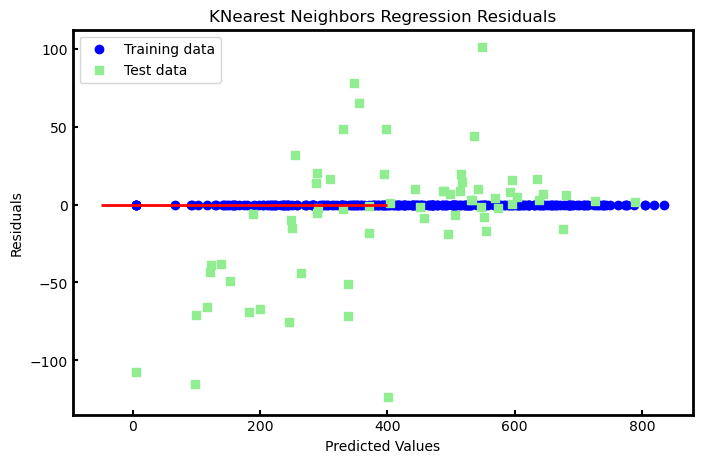

In [72]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('KNearest Neighbors Regression', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig('KNNr-Residual-1.png', dpi=600)

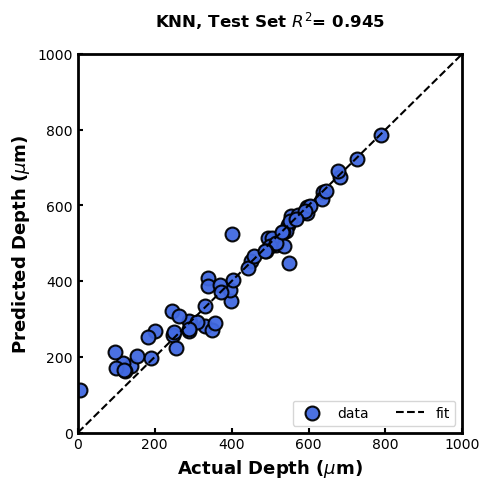

In [73]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('KNN, Test Set $R^2$= ' + str('%.3f' % KNNr_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

##############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

##############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-KNNr-fit.png', dpi=600)
plt.show()


[[165.04138324 165.69011743 166.41170921 ... 617.83124783 617.88688969
  617.94045034]
 [165.04814898 165.69761943 166.42008074 ... 617.83062513 617.88629053
  617.93987336]
 [165.05492218 165.7051302  166.42846267 ... 617.83000217 617.88569113
  617.93929614]
 ...
 [154.80413499 154.79564669 154.77077393 ... 600.59576774 600.62721919
  600.65705134]
 [154.80415359 154.79582013 154.77115423 ... 600.59612215 600.62755517
  600.6573702 ]
 [154.80417073 154.79599161 154.77153191 ... 600.59647636 600.62789096
  600.65768888]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


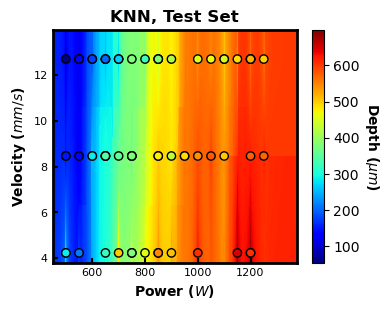

In [74]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

KNNr.fit(x_test.iloc[:,:2], y_test)
W = KNNr.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('KNN, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Deep Neural Network Regression - Scikit Learn**

In [136]:
# Deep Neural Network Reg
DNN = MLPRegressor(hidden_layer_sizes=(5,101,69,101,37), learning_rate_init=0.001, 
                   activation='relu', solver='adam', alpha=0.0001, learning_rate='adaptive',
                   max_iter=2000, shuffle=True, verbose=False)

# specify parameters and distributions to sample from
param_dist = {
    'hidden_layer_sizes': [(128), (128, 64), (128, 64, 32), (256, 128, 64, 32)],
    'activation': ['idendity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': randint(1000, 5000)
    }

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    DNN, param_distributions=param_dist, n_iter=n_iter_search
)

#start = time()
random_search.fit(X, y)
#print(
#    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
#    % ((time() - start), n_iter_search)
#)
report(random_search.cv_results_)

/Users/sina/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sina/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sina/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to conve

Model with rank: 1
Mean validation score: 0.220 (std: 0.412)
Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 3260, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.213 (std: 0.354)
Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 4508, 'solver': 'adam'}

Model with rank: 3
Mean validation score: -1.518 (std: 2.878)
Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 128, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 1465, 'solver': 'lbfgs'}



In [75]:
DNN = MLPRegressor(hidden_layer_sizes=(128,64), learning_rate_init=0.001, 
                   activation='relu', solver='lbfgs', alpha=0.01, learning_rate='adaptive',
                   max_iter=3500, verbose=True, random_state=1)

DNN.fit(X_train, y_train)

y_test_predict = DNN.predict(X_test)
y_train_predict = DNN.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

DNN_R2 = metrics.r2_score(y_test, y_test_predict)
DNN_MAE = metrics.mean_absolute_error(y_test, y_test_predict)

DNN_metrics = get_regression_metrics('KNeighbors Regression', y_test, y_test_predict)
DNN_metrics


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8961     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20517D+05    |proj g|=  4.53358D+02

At iterate    1    f=  1.20114D+04    |proj g|=  7.07516D+02

At iterate    2    f=  1.17303D+04    |proj g|=  9.12283D+02

At iterate    3    f=  4.37849D+03    |proj g|=  1.21630D+03

At iterate    4    f=  2.79103D+03    |proj g|=  2.94630D+02

At iterate    5    f=  2.63732D+03    |proj g|=  2.45632D+02

At iterate    6    f=  2.03561D+03    |proj g|=  1.65666D+02

At iterate    7    f=  1.98233D+03    |proj g|=  5.84911D+01

At iterate    8    f=  1.96900D+03    |proj g|=  5.70765D+01

At iterate    9    f=  1.94816D+03    |proj g|=  9.01377D+01

At iterate   10    f=  1.91710D+03    |proj g|=  1.08033D+02

At iterate   11    f=  1.88205D+03    |proj g|=  6.55815D+01

At iterate   12    f=  1.85872D+03    |proj g|=  2.94331D+01

At iterate   13    f=  1.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


KNeighbors Regression
Root Mean Squared Error              35.591455
Mean Absolute Error                  22.933989
R^2                                   0.960230
Explained Variance                    0.960251

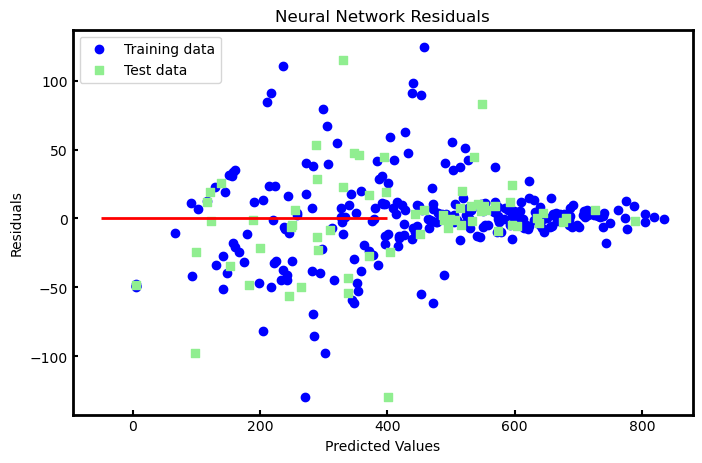

In [76]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

plot_residual('Neural Network', y_train_predict, y_train, y_test_predict, y_test)
#plt.savefig(' Neural Network Residual-1.png', dpi=600)

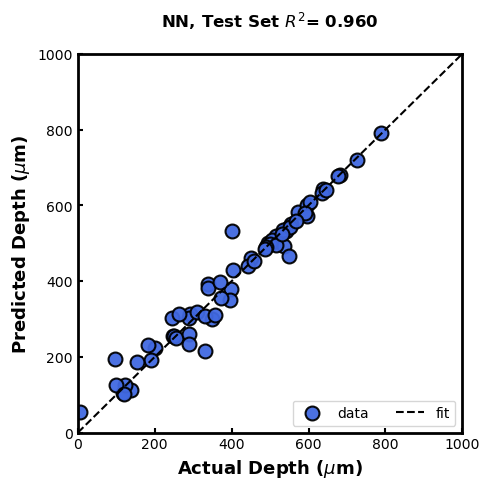

In [77]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('NN, Test Set $R^2$= ' + str('%.3f' % DNN_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real, y_test_predict, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#################

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Height ($\mu$m)', weight='bold', fontsize=13)
#ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#################

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-DNN-fit.png', dpi=600)
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8705     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35375D+05    |proj g|=  1.68339D+05

At iterate    1    f=  5.52997D+03    |proj g|=  1.01671D+04

At iterate    2    f=  4.99537D+03    |proj g|=  4.00961D+03

At iterate    3    f=  4.91001D+03    |proj g|=  2.36890D+02

At iterate    4    f=  4.90963D+03    |proj g|=  8.08042D+01

At iterate    5    f=  4.90950D+03    |proj g|=  8.26425D+01


 This problem is unconstrained.



At iterate    6    f=  4.90845D+03    |proj g|=  2.87718D+02

At iterate    7    f=  4.90637D+03    |proj g|=  5.51447D+02

At iterate    8    f=  4.90022D+03    |proj g|=  1.07713D+03

At iterate    9    f=  4.88450D+03    |proj g|=  1.89605D+03

At iterate   10    f=  4.83551D+03    |proj g|=  3.29016D+03

At iterate   11    f=  3.86736D+03    |proj g|=  9.39450D+03

At iterate   12    f=  3.73813D+03    |proj g|=  2.22901D+04

At iterate   13    f=  2.09207D+03    |proj g|=  4.83295D+04

At iterate   14    f=  1.80472D+03    |proj g|=  2.13120D+03

At iterate   15    f=  1.72345D+03    |proj g|=  6.55081D+03

At iterate   16    f=  1.71729D+03    |proj g|=  1.48280D+03

At iterate   17    f=  1.71711D+03    |proj g|=  2.08372D+02

At iterate   18    f=  1.71692D+03    |proj g|=  5.83569D+02

At iterate   19    f=  1.71676D+03    |proj g|=  1.84808D+02

At iterate   20    f=  1.71662D+03    |proj g|=  2.12278D+02

At iterate   21    f=  1.71655D+03    |proj g|=  7.35933D+02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(



At iterate   36    f=  1.71603D+03    |proj g|=  1.47227D+02

At iterate   37    f=  1.71603D+03    |proj g|=  2.99208D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8705     37    124      2     0     0   2.992D+02   1.716D+03
  F =   1716.0274347614538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[[244.80023179 247.01057825 249.21513246 ... 894.67677384 896.85613645
  899.03549906]
 [244.11635841 246.33671248 248.55128852 ... 894.06751064 896.24687324
  898.42623585]
 [243.43248502 245.65283909 247.87319316 ... 893.45824743 895.63761004
  897.81697265]
 ...
 [ 50.19354999  51.97400409  53.7

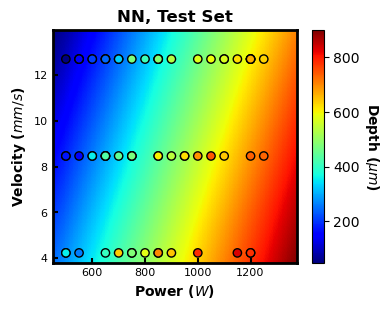

In [78]:
# Power vs. Velocity

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.1*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.9*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)

DNN.fit(x_test.iloc[:,:2], y_test)
W = DNN.predict(np.c_[xx.ravel(), yy.ravel()])
z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)

cm_bright = "hsv"
plt.pcolormesh(xx, yy, z, cmap = 'jet')

cbar = plt.colorbar()
#cbar.ax.set_ylabel('Width ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
#cbar.ax.set_ylabel('Height ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')
cbar.ax.set_ylabel('Depth ($\mu$$m$)', rotation = 270, labelpad = 15, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.tight_layout()
plt.title('NN, Test Set', weight='bold')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= 'jet')
plt.show()

## **Overall Performance Comparison**

### **Width Regression**

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2113/2934802294.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


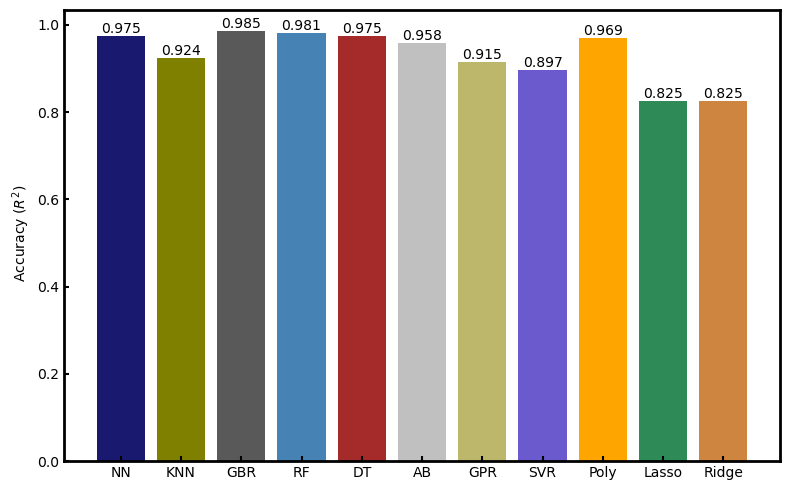

In [79]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
R2 = (0.975, 0.924, 0.985, 0.981, 0.975, 0.958, 0.915, 0.897, 0.969, 0.825, 0.825)
x_pos = np.arange(len(models))

ax.bar(models, R2, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel(' Accuracy ($R^2$)')
# ax.set_title('Width Prediction, Test Set Accuracy')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2113/1161757768.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


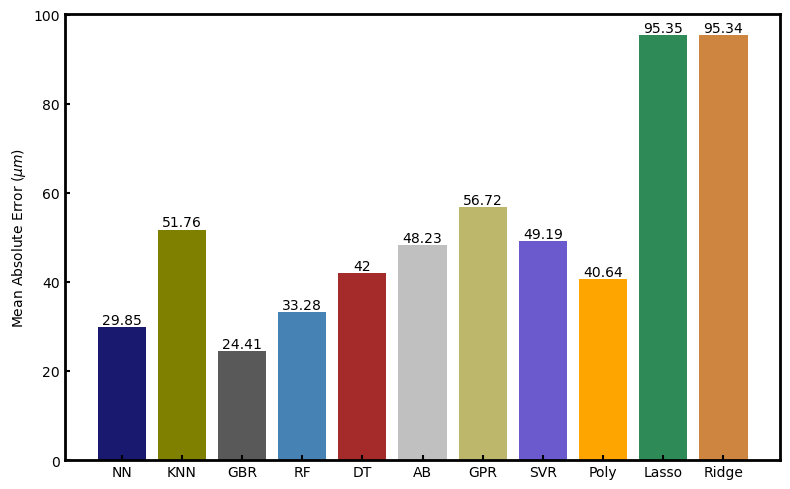

In [80]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
MAE = (29.85, 51.76, 24.41, 33.28, 42.00, 48.23, 56.72, 49.19, 40.64, 95.35, 95.34)
x_pos = np.arange(len(models))

ax.bar(models, MAE, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Mean Absolute Error ($\mu$$m$)')
# ax.set_title('Width Prediction, Test Set MAE')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

### **Height Regression**

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2889/209541138.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


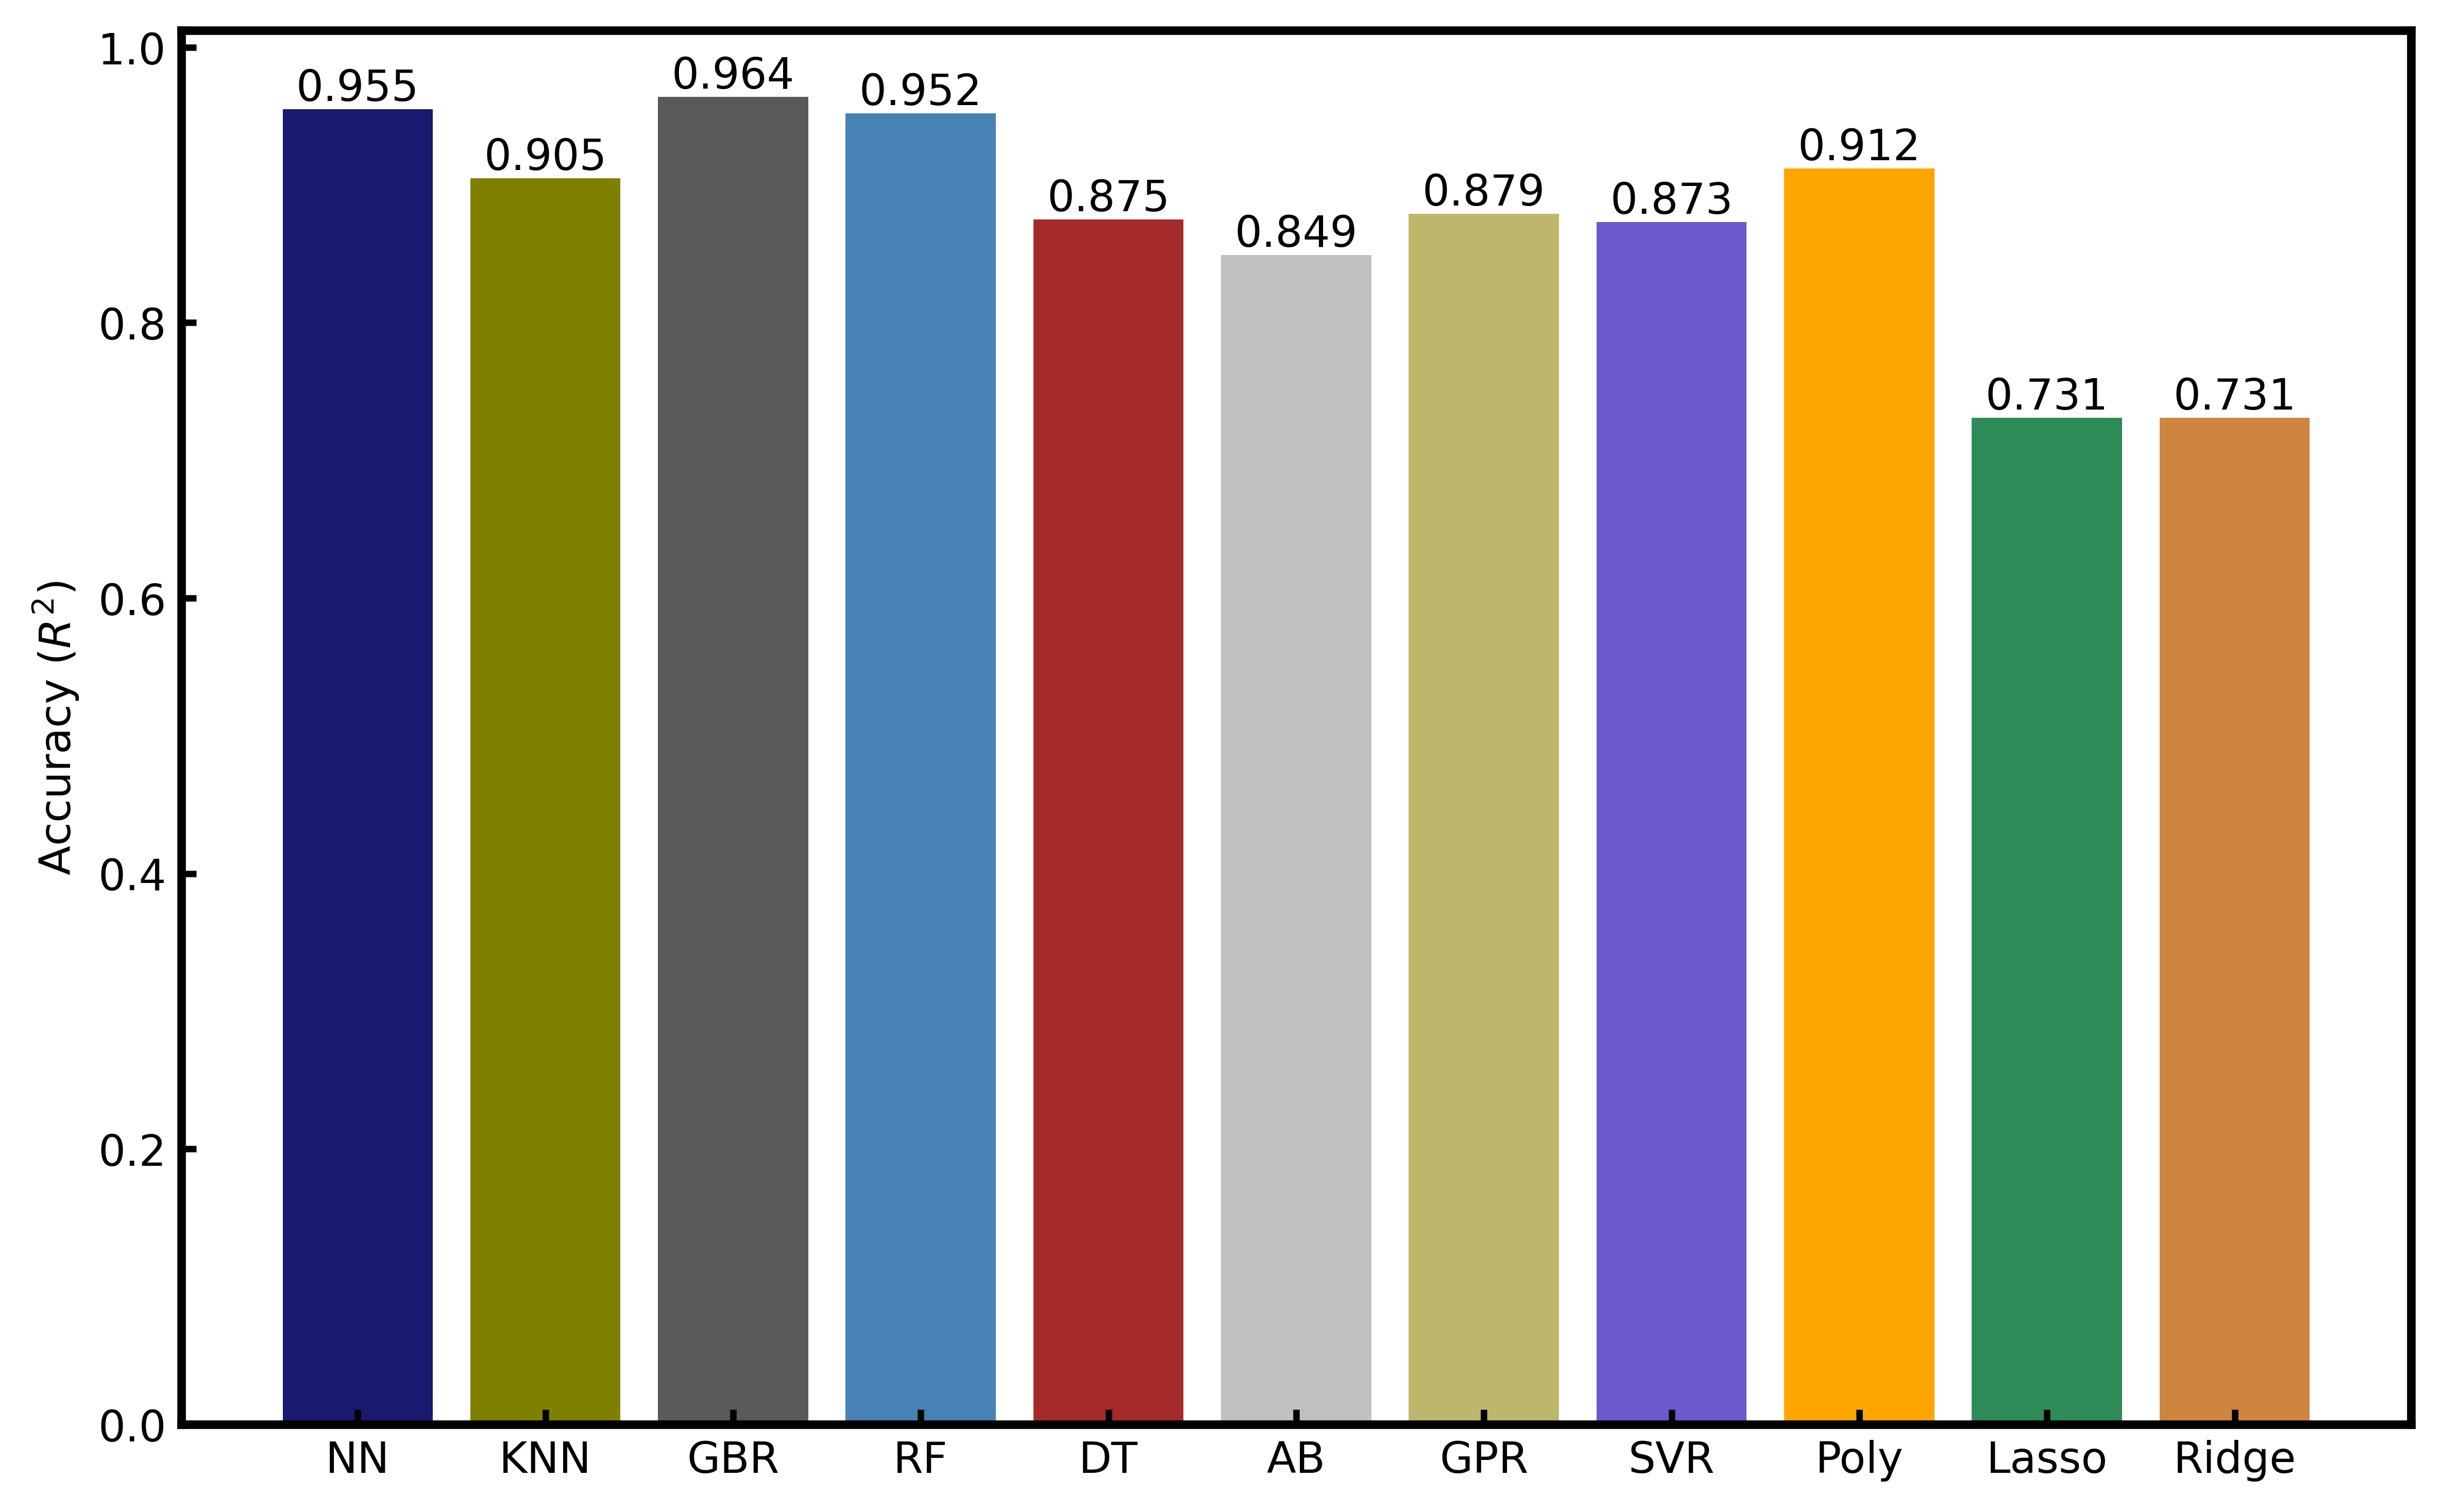

In [27]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
R2 = (0.955, 0.905, 0.964, 0.952, 0.875, 0.849, 0.879, 0.873, 0.912, 0.731, 0.731)
x_pos = np.arange(len(models))

ax.bar(models, R2, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Accuracy ($R^2$)')
# ax.set_title('Height Prediction, Test Set Accuracy')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2889/2675931590.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


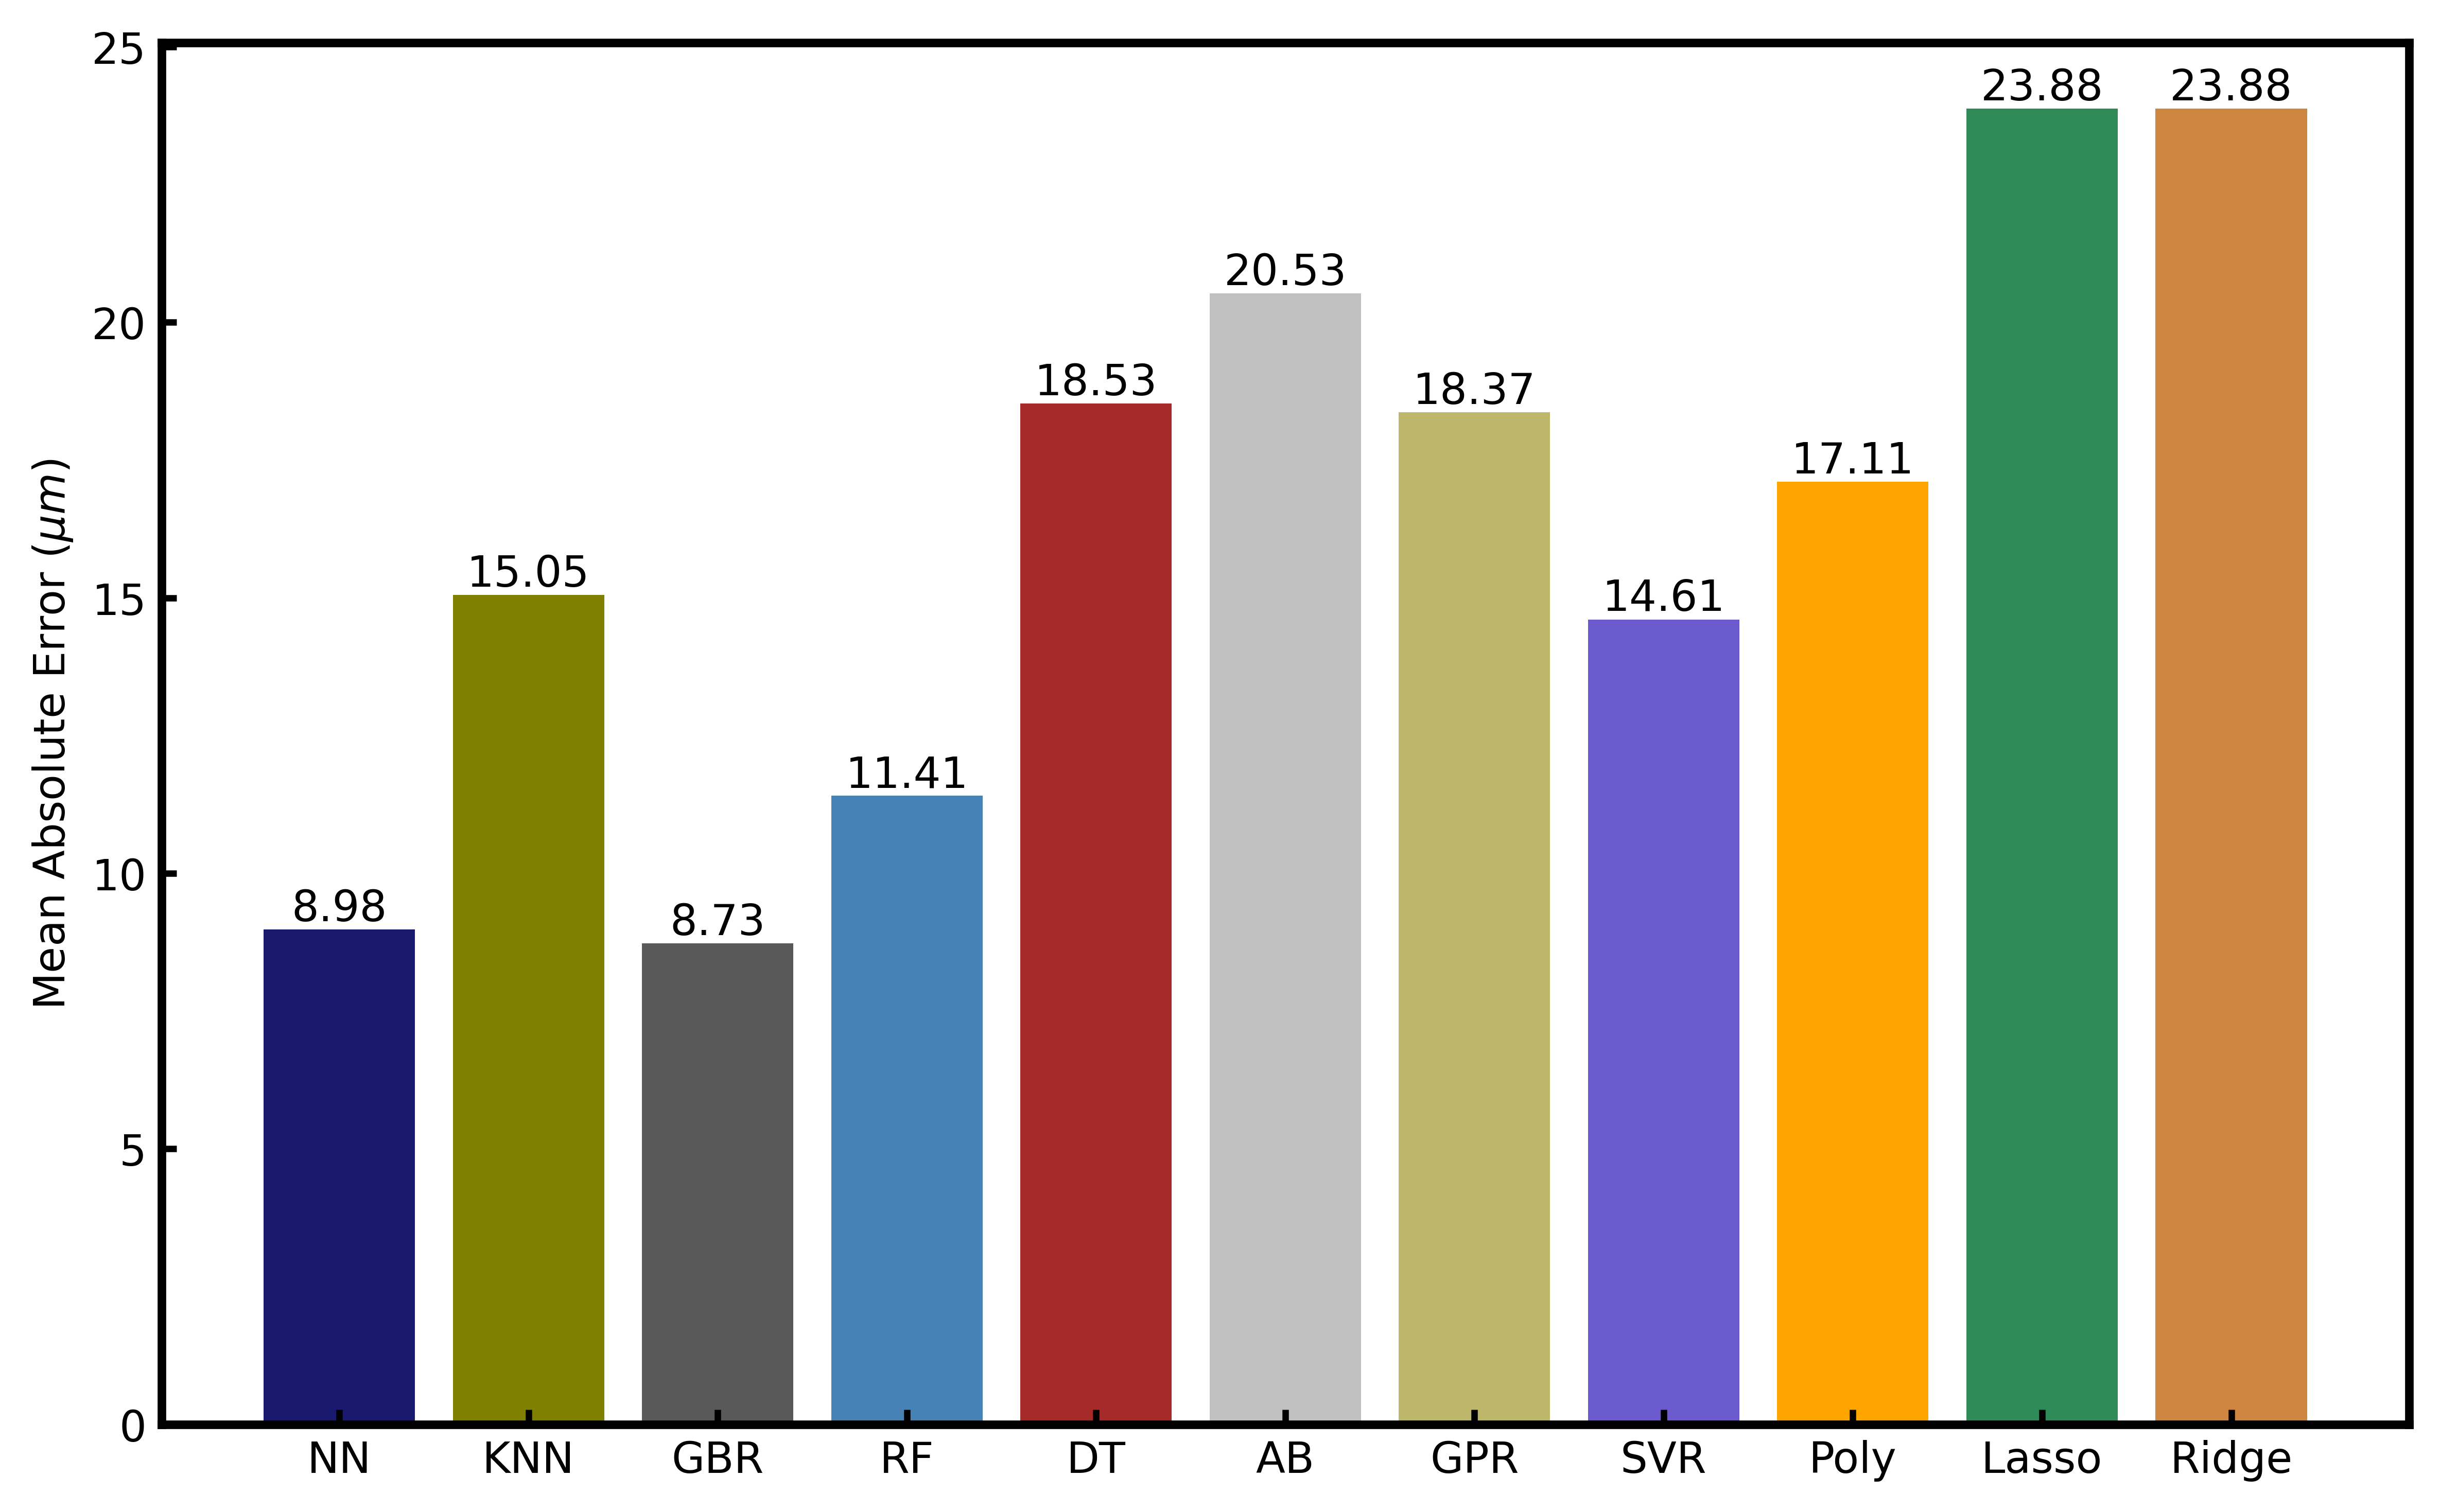

In [28]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
MAE = (8.98, 15.05, 8.73, 11.41, 18.53, 20.53, 18.37, 14.61, 17.11, 23.88, 23.88)
x_pos = np.arange(len(models))

ax.bar(models, MAE, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Mean Absolute Error ($\mu$$m$)')
# ax.set_title('Height Prediction, Test Set MAE')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

### **Depth Regression**

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2889/1389549360.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


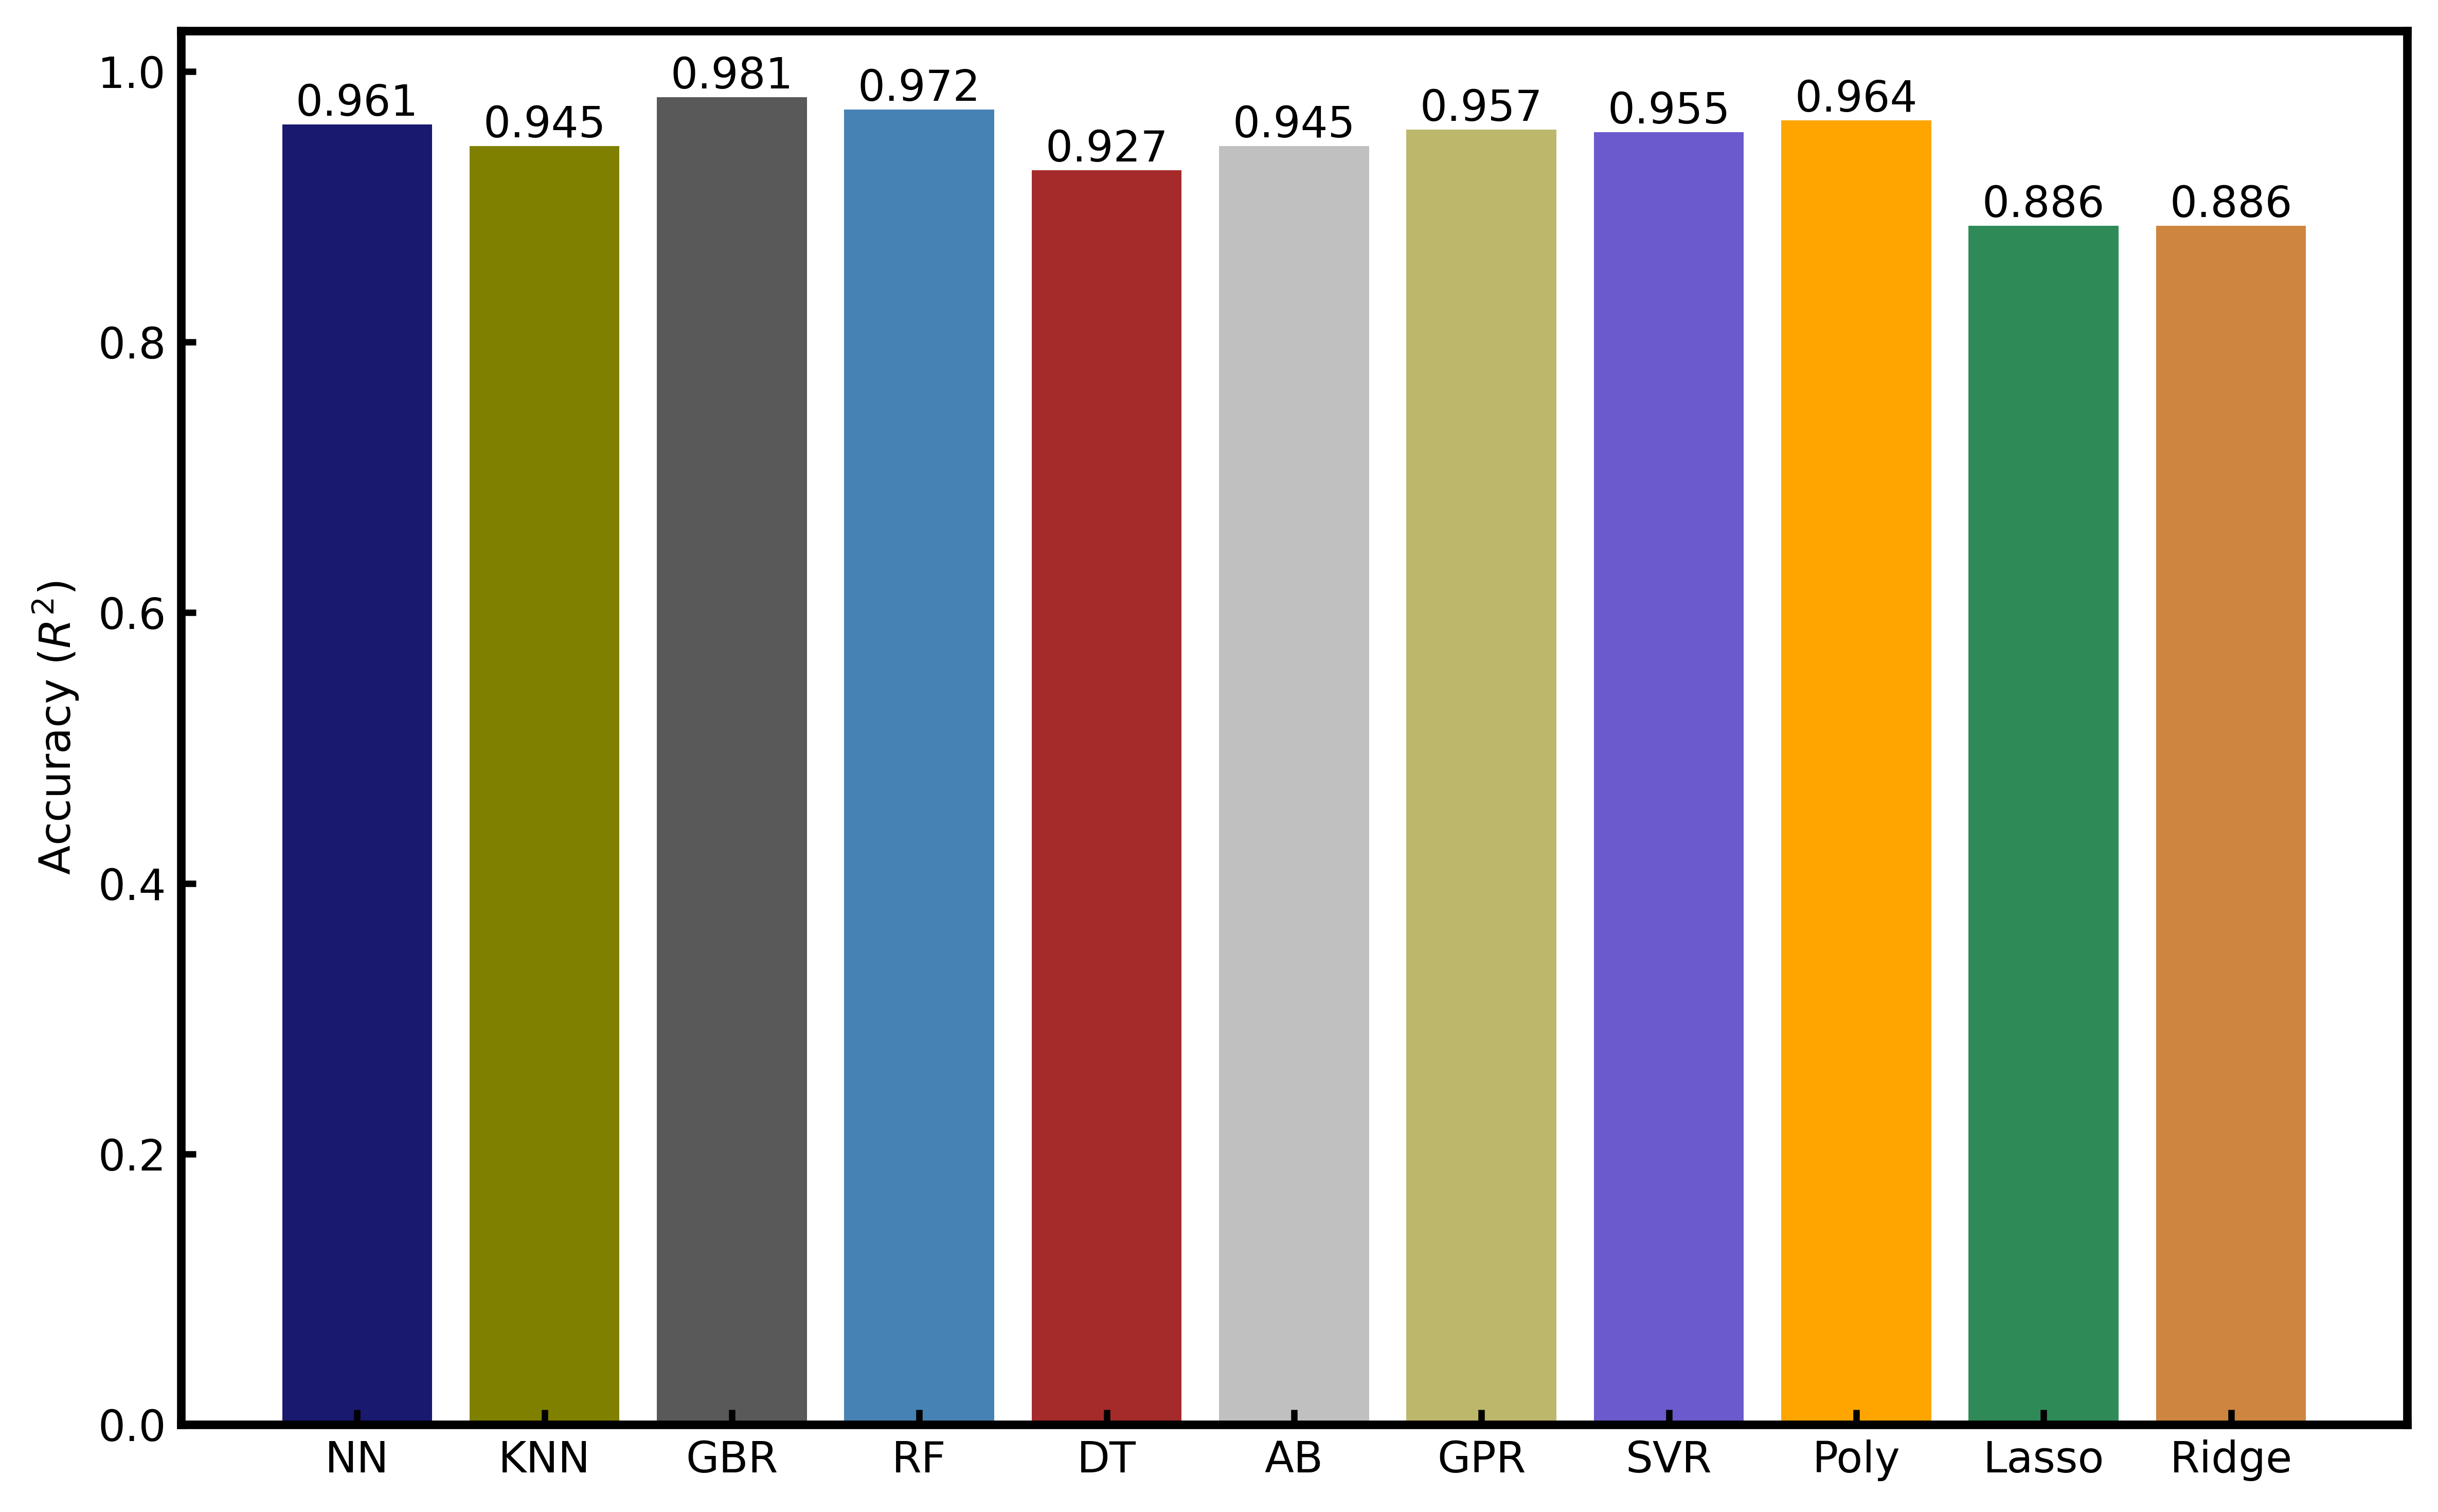

In [30]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
R2 = (0.961, 0.945, 0.981, 0.972, 0.927, 0.945, 0.957, 0.955, 0.964, 0.886, 0.886)
x_pos = np.arange(len(models))

ax.bar(models, R2, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Accuracy ($R^2$)')
# ax.set_title('Depth Prediction, Test Set Accuracy')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2889/1833702372.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


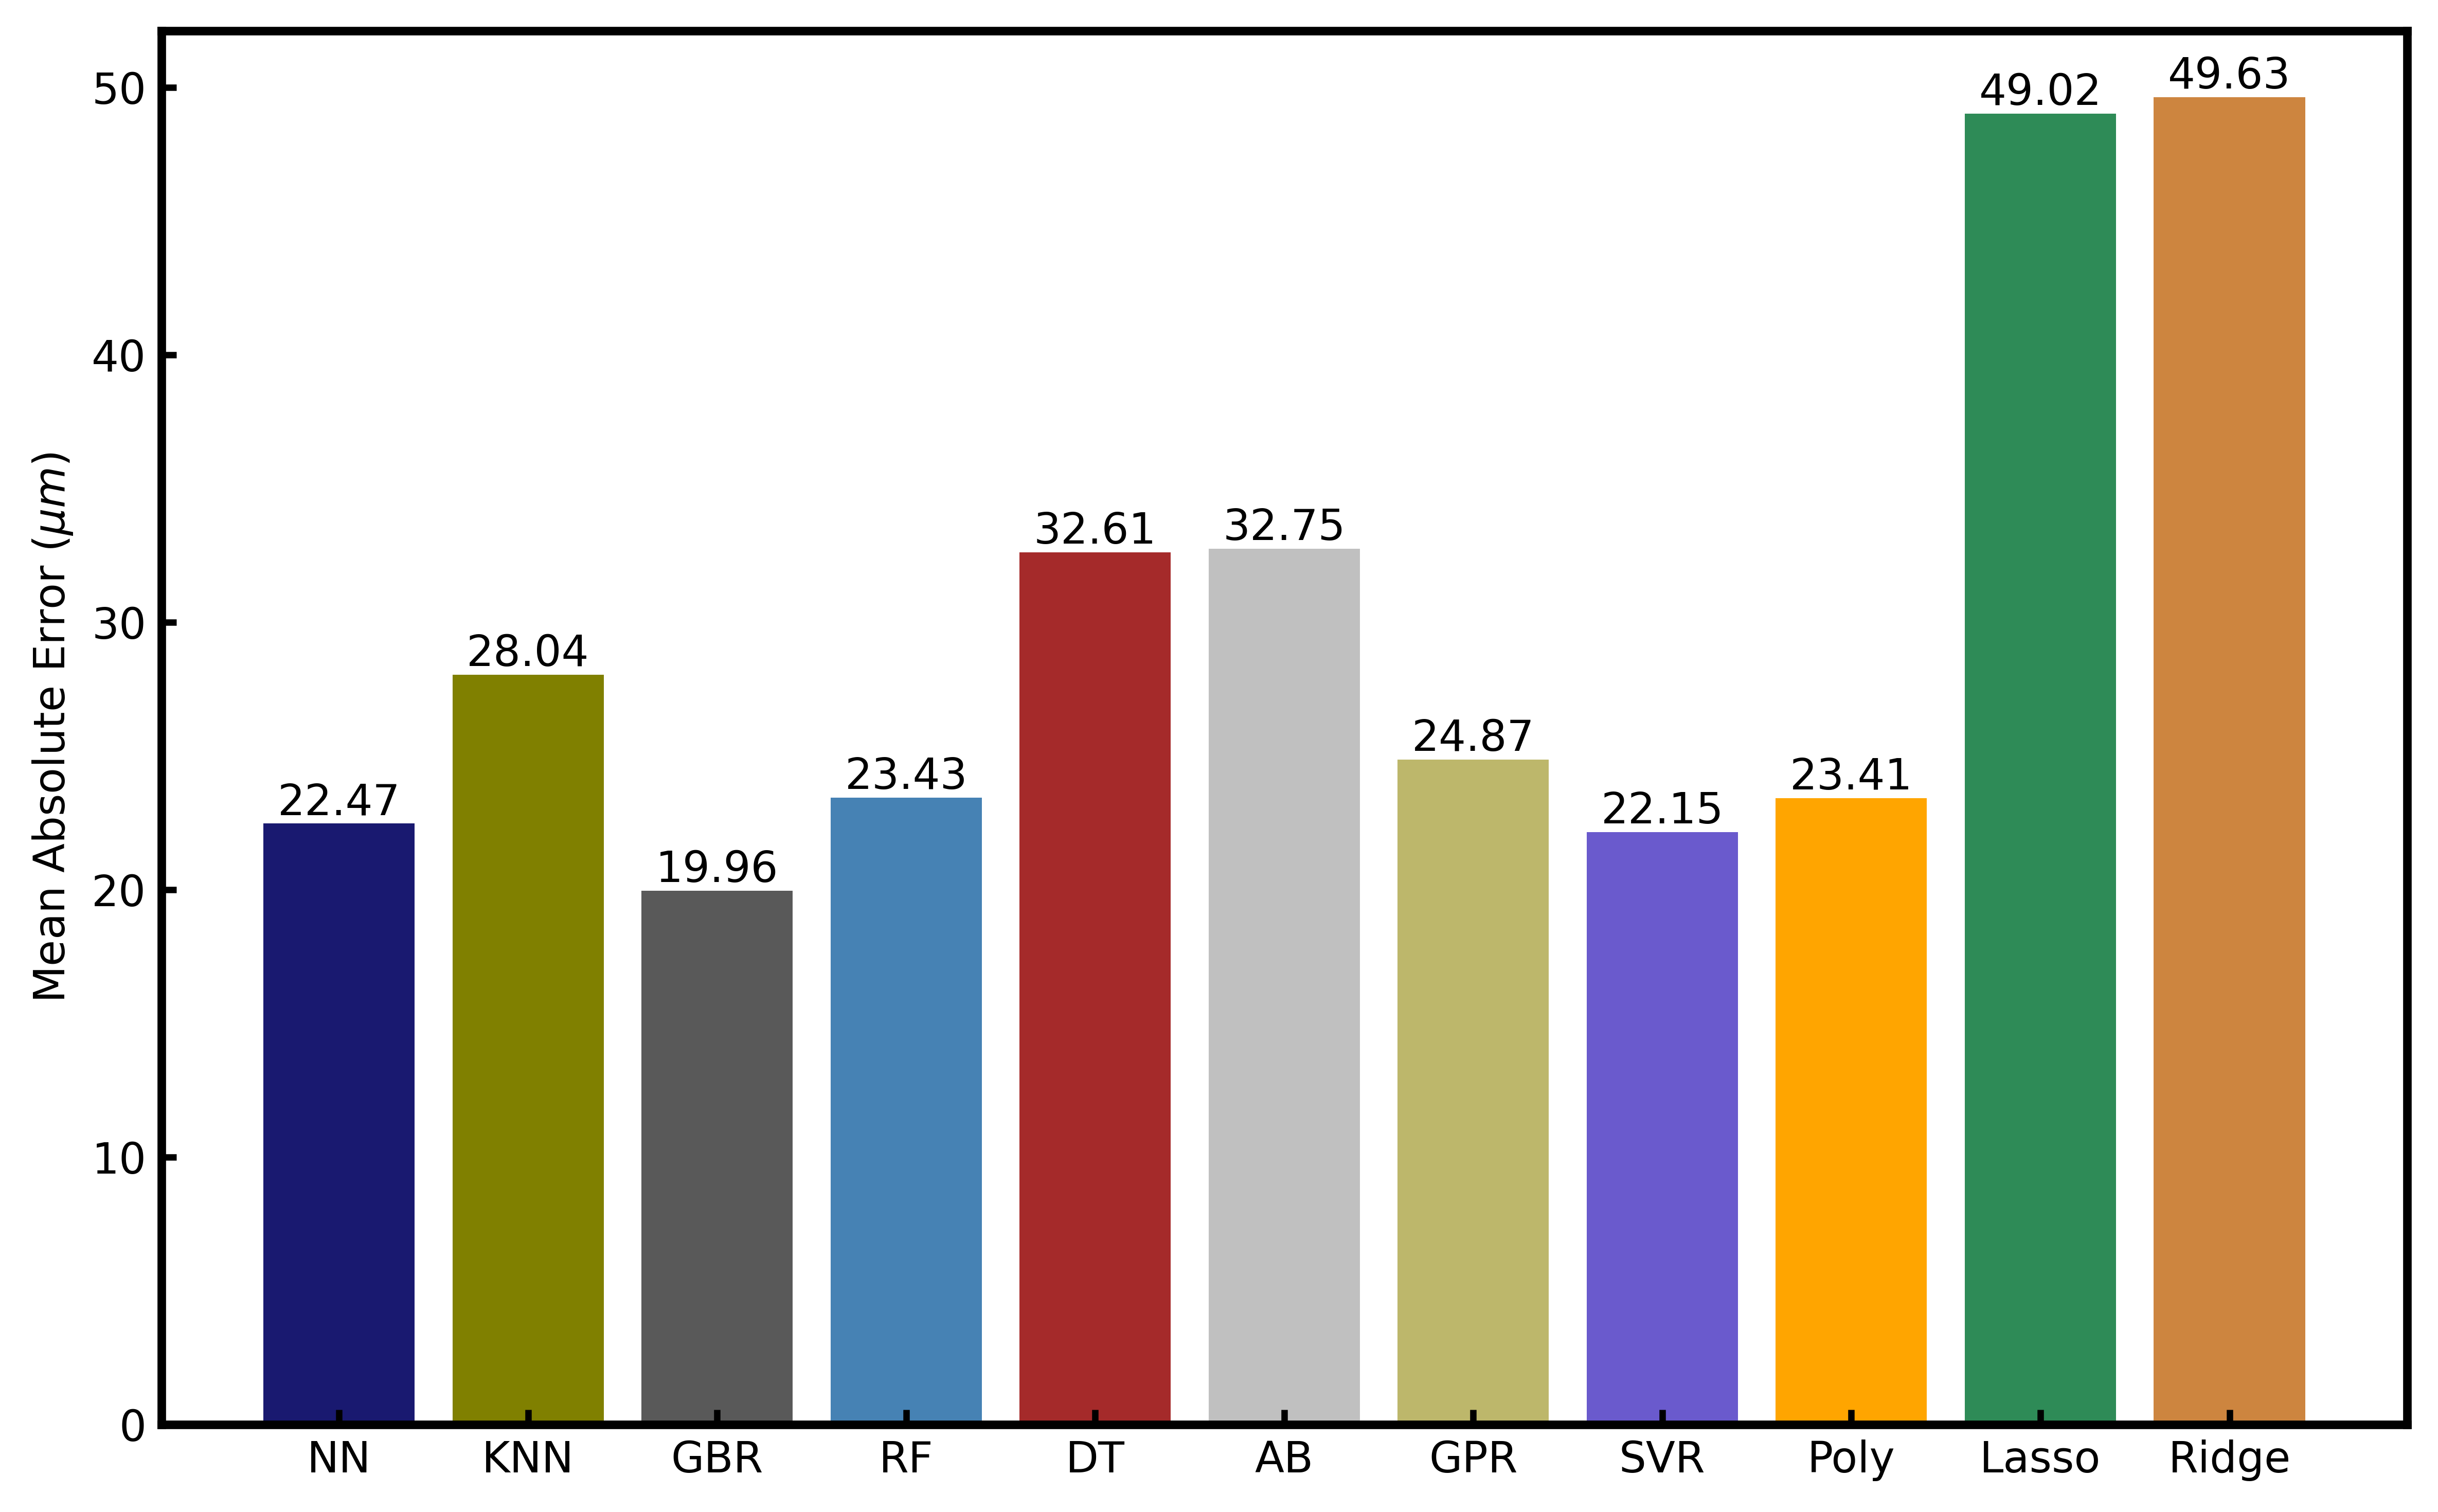

In [31]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBR","RF", "DT", "AB", "GPR", "SVR", "Poly", "Lasso", "Ridge")
MAE = (22.47, 28.04, 19.96, 23.43, 32.61, 32.75, 24.87, 22.15, 23.41, 49.02, 49.63)
x_pos = np.arange(len(models))

ax.bar(models, MAE, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Mean Absolute Error ($\mu$$m$)')
# ax.set_title('Depth Prediction, Test Set MAE')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

## **Best Model Predictions**

### **#### Depth Prediction ####**

Best model to predict Depth is:


*   Gradient Boosting Regression



In [81]:
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_features='sqrt', max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=1)
GBR.fit(X_train, y_train)
depth_predict = GBR.predict(X_test)
depth_real = y_test

depth_predict = pd.Series(depth_predict).astype(int)
depth_real = pd.Series(depth_real).astype(int)

data = {
    "True values": depth_real,
    "Predicted Values": depth_predict
}

df_gk_final = pd.concat(data, axis = 1)
list_of_indexes = list(depth_real.index)
list_of_pred_depth = list(depth_predict)
list_of_real_depth = list(depth_real)
list_total = list(zip(list_of_indexes, list_of_real_depth, list_of_pred_depth))
df_gk_final_depth = pd.DataFrame(list_total, columns = ['Index', 'Ground Truth Depth (um)', 'Predicted Depth (um)'])

x_t = x_test.reset_index(drop = True)
power = x_t["P_input (W)"]
velocity = x_t["v_l (mm/s)"]
pf_ts = x_t["Pf_Ts (g/mm)"]
E = x_t["E(j/mm3)"]
df_final_depth = df_gk_final_depth.assign( Power = power, Velocity = velocity, Linear_mass_deposition = pf_ts, Volumetric_Energy_Density = E )
#df_final_depth

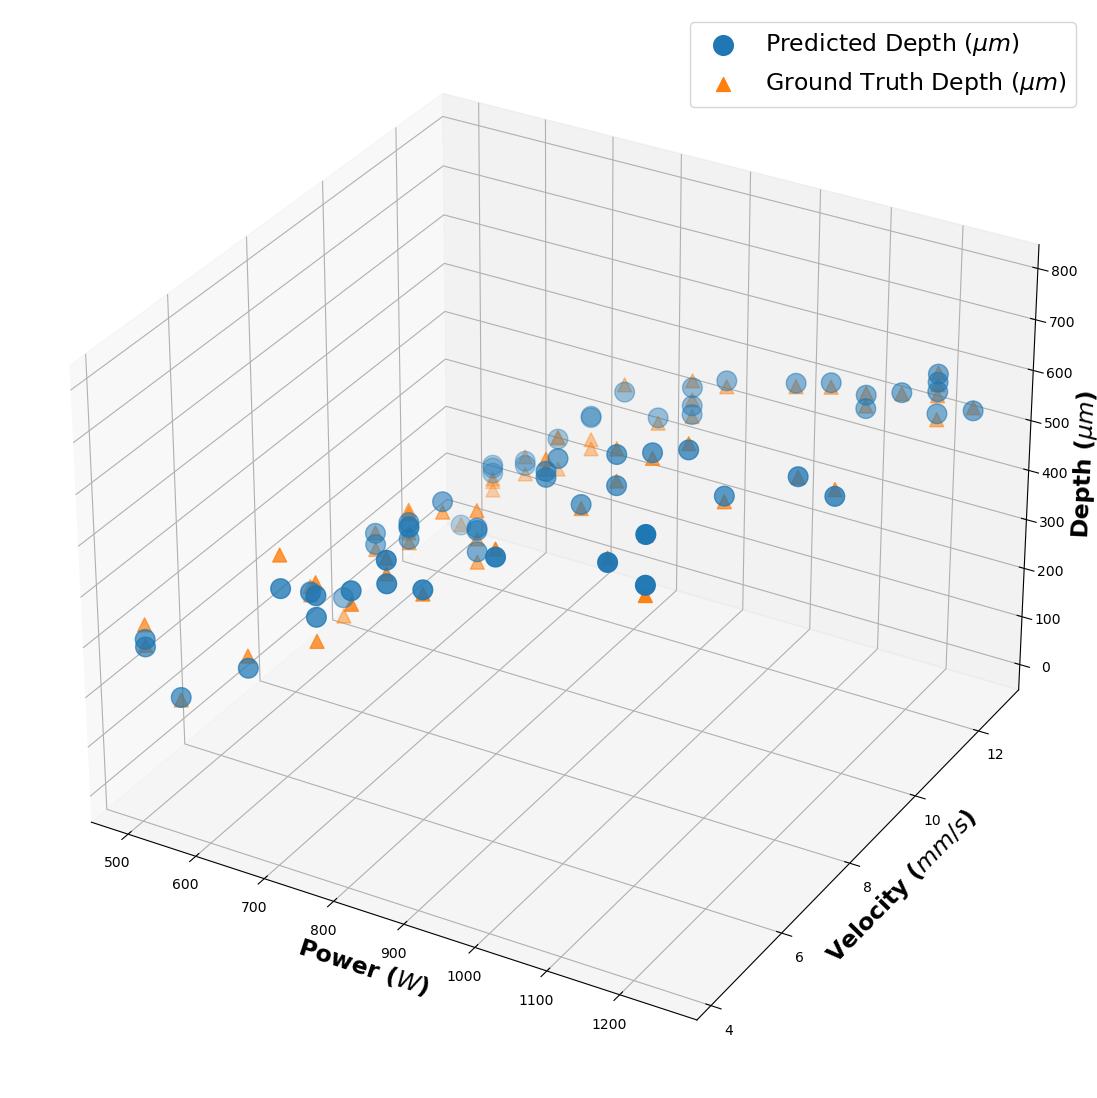

In [82]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_depth['Power']
ys = df_final_depth['Velocity']
z = df_final_depth['Predicted Depth (um)']
zs = df_final_depth['Ground Truth Depth (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Depth ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Depth ($\mu$$m$)", marker='^')

ax.set_xlabel("Power ($W$)", weight='bold', fontsize=17)
ax.set_ylabel("Velocity ($mm/s$)", weight='bold', fontsize=17)
ax.set_zlabel("Depth ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

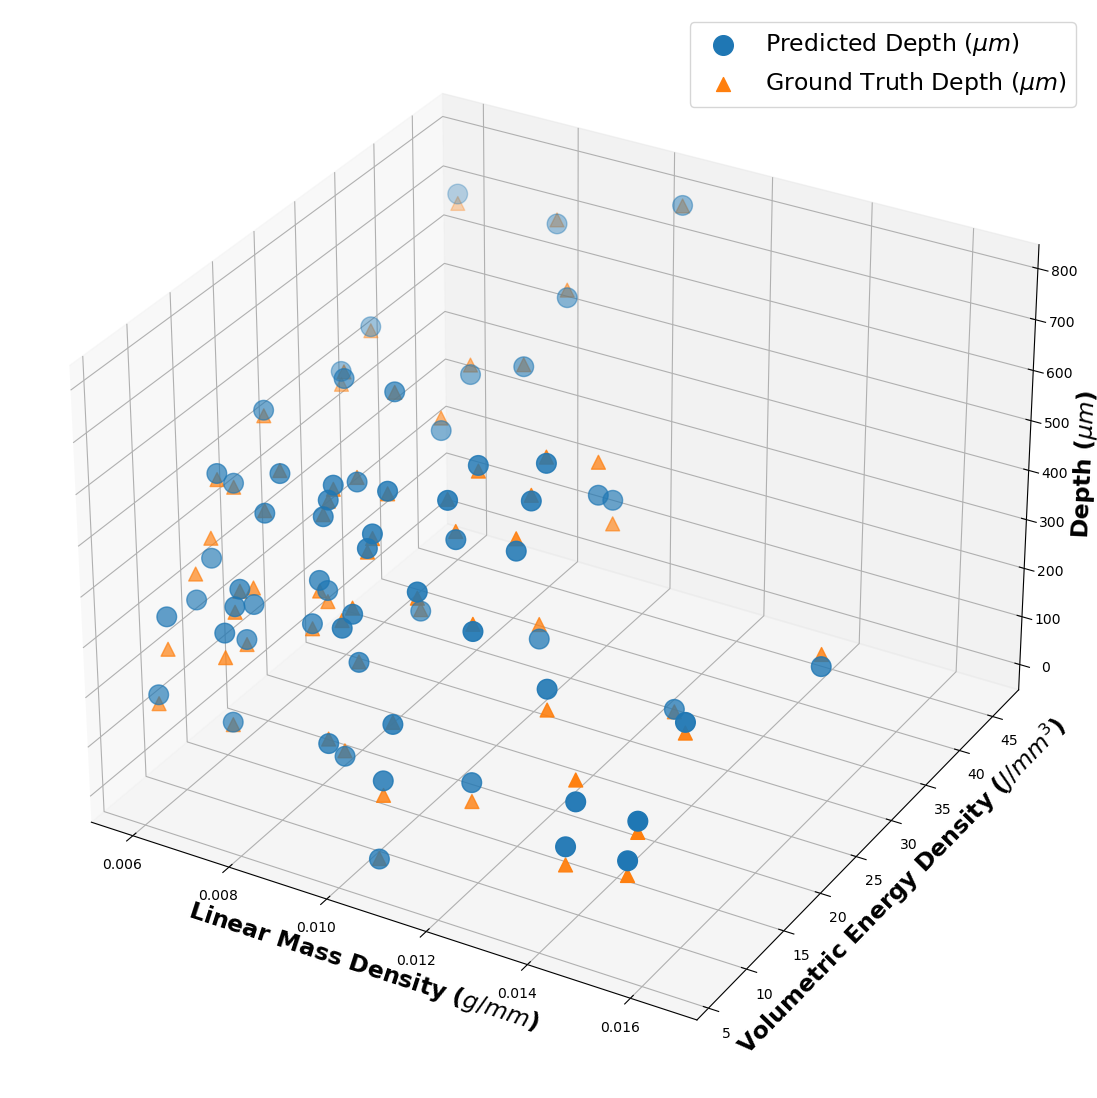

In [83]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_depth['Linear_mass_deposition']
ys = df_final_depth['Volumetric_Energy_Density']
z = df_final_depth['Predicted Depth (um)']
zs = df_final_depth['Ground Truth Depth (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Depth ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Depth ($\mu$$m$)", marker='^')

ax.set_xlabel("Linear Mass Density ($g/mm$)", weight='bold', fontsize=17)
ax.set_ylabel("Volumetric Energy Density ($J/mm^3$)", weight='bold', fontsize=17)
ax.set_zlabel("Depth ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

### **#### Height Prediction ####**

Best model to predict Height is:


*   Gradient Boosting Regression


In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_features='sqrt', max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=1)
GBR.fit(X_train, y_train)
height_predict = GBR.predict(X_test)
height_real = y_test

height_predict = pd.Series(height_predict).astype(int)
height_real = pd.Series(height_real).astype(int)

data = {
    "True values": height_real,
    "Predicted Values": height_predict
}

df_gk_final = pd.concat(data, axis = 1)
list_of_indexes = list(height_real.index)
list_of_pred_height = list(height_predict)
list_of_real_height = list(height_real)
list_total = list(zip(list_of_indexes, list_of_real_height, list_of_pred_height))
df_gk_final_height = pd.DataFrame(list_total, columns = ['Index', 'Ground Truth Height (um)', 'Predicted Height (um)'])

x_t = x_test.reset_index(drop = True)
power = x_t["P_input (W)"]
velocity = x_t["v_l (mm/s)"]
pf_ts = x_t["Pf_Ts (g/mm)"]
E = x_t["E(j/mm3)"]
df_final_height = df_gk_final_height.assign( Power = power, Velocity = velocity, Linear_mass_deposition = pf_ts, Volumetric_Energy_Density = E )

In [ ]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_height['Power']
ys = df_final_height['Velocity']
z = df_final_height['Predicted Height (um)']
zs = df_final_height['Ground Truth Height (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Height ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Height ($\mu$$m$)", marker='^')

ax.set_xlabel("Power ($W$)", weight='bold', fontsize=17)
ax.set_ylabel("Velocity ($mm/s$)", weight='bold', fontsize=17)
ax.set_zlabel("Height ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

In [ ]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_height['Linear_mass_deposition']
ys = df_final_height['Volumetric_Energy_Density']
z = df_final_height['Predicted Height (um)']
zs = df_final_height['Ground Truth Height (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Height ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Height ($\mu$$m$)", marker='^')

ax.set_xlabel("Linear Mass Density ($g/mm$)", weight='bold', fontsize=17)
ax.set_ylabel("Volumetric Energy Density ($J/mm^3$)", weight='bold', fontsize=17)
ax.set_zlabel("Height ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

### **#### Width Prediction ####**

Best model to predict Width is:


*   Gradient Boosting Regression

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=916, learning_rate=0.01, max_features='sqrt', max_depth=60, min_samples_split=5, min_samples_leaf=4, random_state=1)
GBR.fit(X_train, y_train)
width_predict = GBR.predict(X_test)
width_real = y_test

width_predict = pd.Series(width_predict).astype(int)
width_real = pd.Series(width_real).astype(int)

data = {
    "True values": width_real,
    "Predicted Values": width_predict
}

df_gk_final = pd.concat(data, axis = 1)
list_of_indexes = list(width_real.index)
list_of_pred_width = list(width_predict)
list_of_real_width = list(width_real)
list_total = list(zip(list_of_indexes, list_of_real_width, list_of_pred_width))
df_gk_final_width = pd.DataFrame(list_total, columns = ['Index', 'Ground Truth Width (um)', 'Predicted Width (um)'])

x_t = x_test.reset_index(drop = True)
power = x_t["P_input (W)"]
velocity = x_t["v_l (mm/s)"]
pf_ts = x_t["Pf_Ts (g/mm)"]
E = x_t["E(j/mm3)"]
df_final_width = df_gk_final_width.assign( Power = power, Velocity = velocity, Linear_mass_deposition = pf_ts, Volumetric_Energy_Density = E )


In [ ]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_width['Power']
ys = df_final_width['Velocity']
z = df_final_width['Predicted Width (um)']
zs = df_final_width['Ground Truth Width (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Width ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Width ($\mu$$m$)", marker='^')

ax.set_xlabel("Power ($W$)", weight='bold', fontsize=17)
ax.set_ylabel("Velocity ($mm/s$)", weight='bold', fontsize=17)
ax.set_zlabel("Width ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

In [ ]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = fig.add_subplot(projection='3d')

xs = df_final_width['Linear_mass_deposition']
ys = df_final_width['Volumetric_Energy_Density']
z = df_final_width['Predicted Width (um)']
zs = df_final_width['Ground Truth Width (um)']

ax.scatter(xs, ys, z, s=200, label="Predicted Width ($\mu$$m$)", marker='o')
ax.scatter(xs, ys, zs, s=100,  label="Ground Truth Width ($\mu$$m$)", marker='^')

ax.set_xlabel("Linear Mass Density ($g/mm$)", weight='bold', fontsize=17)
ax.set_ylabel("Volumetric Energy Density ($J/mm^3$)", weight='bold', fontsize=17)
ax.set_zlabel("Width ($\mu$$m$)", weight='bold', fontsize=17)
ax.legend(fontsize=17)
plt.show()

---

---


# **Task 2: Classification**

---


---

## **Data processing**

In [84]:
cl_df_c = Full_df.drop(columns=['Powder Material', 'Substrate Material', 'E(j/mm3)', 'Beam Radius','Depth (um)','Height (um)','Width (um)','Area (um2)','Contact angle', 'Max Temp', 'dilution'])
cl_df_c

P_input (W)  v_l (mm/s)  Pf_Ts (g/mm)     Meltpool_label
0            500        4.23        0.0059  Undesirable Shape
1            500        4.23        0.0071  Undesirable Shape
2            500        4.23        0.0083  Undesirable Shape
3            500        4.23        0.0094  Undesirable Shape
4            500        4.23        0.0106  Undesirable Shape
..           ...         ...           ...                ...
319         1250       12.69        0.0071  Undesirable Shape
320         1250       12.69        0.0083  Undesirable Shape
321         1250       12.69        0.0094  Undesirable Shape
322         1250       12.69        0.0106  Undesirable Shape
323         1250       12.69        0.0118  Undesirable Shape

[324 rows x 4 columns]

In [85]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['Meltpool_label']
df_categorical_values = cl_df_c[categorical_columns]
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

      Meltpool_label
0  Undesirable Shape
1  Undesirable Shape
2  Undesirable Shape
3  Undesirable Shape
4  Undesirable Shape
--------------------
   Meltpool_label
0               1
1               1
2               1
3               1
4               1


In [86]:
meltpool_label_enc = df_categorical_values_enc["Meltpool_label"]
cl_df = cl_df_c.assign(Meltpool_label_enc = meltpool_label_enc )
cl_df = cl_df.drop(columns=['Meltpool_label'])
cl_df

P_input (W)  v_l (mm/s)  Pf_Ts (g/mm)  Meltpool_label_enc
0            500        4.23        0.0059                   1
1            500        4.23        0.0071                   1
2            500        4.23        0.0083                   1
3            500        4.23        0.0094                   1
4            500        4.23        0.0106                   1
..           ...         ...           ...                 ...
319         1250       12.69        0.0071                   1
320         1250       12.69        0.0083                   1
321         1250       12.69        0.0094                   1
322         1250       12.69        0.0106                   1
323         1250       12.69        0.0118                   1

[324 rows x 4 columns]

In [87]:
X_cl = cl_df.drop(["Meltpool_label_enc"], axis = 1)   #independent features
y_cl = cl_df["Meltpool_label_enc"]                 #dependent features

In [88]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_cl, y_cl, test_size=0.2, random_state= 42)

In [89]:
# Step 2: the value of every feature is mapped to the [0,1] range linearly
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# Training Set
scaler = MinMaxScaler()
X_total_sc = scaler.fit_transform(X_cl)
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)
X_crossval = scaler.fit_transform(X_cl)

## **Decision Tree Classifier**

In [ ]:
# Decision Tree clf
DTC = DecisionTreeClassifier(max_depth=12, max_features=3, random_state=123)

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, num = 10)]
max_depth.append(None)
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

# specify parameters and distributions to sample from
param_dist = {
    'max_depth': max_depth, 
    'max_features': max_features,
    'criterion': criterion,
    'min_samples_leaf':[2,4,6,8,10,20,30],
    'min_samples_split':[2,3,4,5,6,8,10]
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    DTC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_cl, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.938


The 5-fold cross-validation accuracy score for this classifier is 0.889


the classifier AUC score is 0.691

              precision    recall  f1-score   support

   Desirable       0.78      0.78      0.78         9
 Undesirable       0.96      0.96      0.96        56

   micro avg       0.94      0.94      0.94        65
   macro avg       0.87      0.87      0.87        65
weighted avg       0.94      0.94      0.94        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

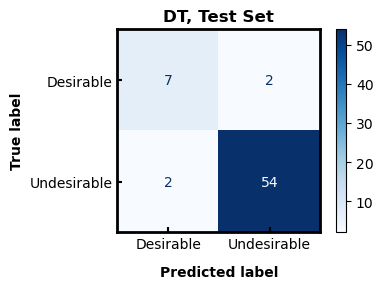

In [90]:
# Create a Decision Tree classifier and train it on 80% of the data set.
DTC = DecisionTreeClassifier(max_depth=890, max_features='log2', criterion = 'gini',random_state=42)
DTC.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = DTC.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

DTC_pipe = make_pipeline(SelectKBest(f_classif, k=2),DTC)
scores = cross_val_score(DTC_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
DTC_accuracy = np.average(cross_val_score(DTC, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, DTC_accuracy))

y_pred_DTC = DTC.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
dt_y_pred_proba = cross_val_predict(DTC, X_crossval, y_cl, cv=5, method='predict_proba')
dt_auc_score = roc_auc_score(y_cl, dt_y_pred_proba[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_cl, dt_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(dt_auc_score))

#########

target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_DTC, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_DTC, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('DT, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


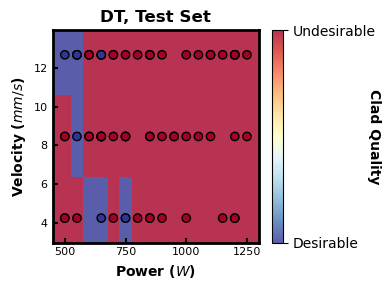

In [91]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


DTC = DecisionTreeClassifier(max_depth=560, max_features='log2',
                              criterion = 'entropy', random_state=42).fit(x_test.iloc[:,:2], y_test)
W = DTC.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)


ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])
plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)


cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('DT, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Random Forest Classifier**

In [ ]:
# Random Forest clf
RFC = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1)

# specify parameters and distributions to sample from

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# criterion
criterion = ['gini', 'entropy', 'log_loss']

param_dist = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion,
    #'bootstrap': bootstrap
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    RFC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_cl, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.923


The 5-fold cross-validation accuracy score for this classifier is 0.895


the classifier AUC score is 0.886

              precision    recall  f1-score   support

   Desirable       0.75      0.67      0.71         9
 Undesirable       0.95      0.96      0.96        56

   micro avg       0.92      0.92      0.92        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.92      0.92      0.92        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

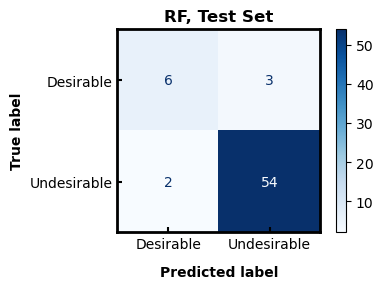

In [92]:
# Random Forest clf

RFC = RandomForestClassifier(n_estimators=894, min_samples_split=2, min_samples_leaf=4, max_features= 'sqrt', max_depth=10, criterion='entropy', random_state=42)
RFC.fit(X_train_sc, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = RFC.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

RFC_pipe = make_pipeline(SelectKBest(f_classif, k=3),RFC)
scores = cross_val_score(RFC_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
RFC_accuracy = np.average(cross_val_score(RFC, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, RFC_accuracy))

y_pred_RFC = RFC.fit(X_train_sc, y_train).predict(X_test_sc)


######### calculate the AUC value
rf_y_pred_proba = cross_val_predict(RFC, X_crossval, y_cl, cv=5, method='predict_proba')
rf_auc_score = roc_auc_score(y_cl, rf_y_pred_proba[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_cl, rf_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(rf_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_RFC, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_RFC, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('RF, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


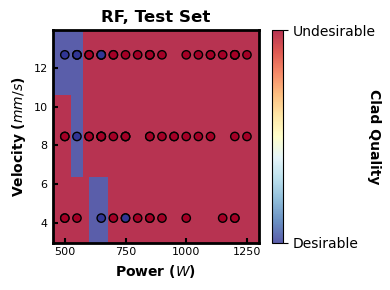

In [93]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


RFC = RandomForestClassifier(n_estimators=894, max_features= 'log2', max_depth=10,
                             criterion='entropy', random_state=42).fit(x_test.iloc[:,:2], y_test)
W = RFC.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('RF, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **AdaBoost Classifier**

In [ ]:
# AdaBoost clf
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# specify parameters and distributions to sample from
# Number of trees in Adaboost regressor
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]

param_dist = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    ABC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_cl, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.908


The 5-fold cross-validation accuracy score for this classifier is 0.806


the classifier AUC score is 0.801

              precision    recall  f1-score   support

   Desirable       0.67      0.67      0.67         9
 Undesirable       0.95      0.95      0.95        56

   micro avg       0.91      0.91      0.91        65
   macro avg       0.81      0.81      0.81        65
weighted avg       0.91      0.91      0.91        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

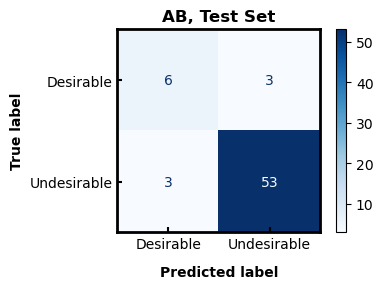

In [94]:
# AdaBoost clf

ABC = AdaBoostClassifier(n_estimators=577, learning_rate=0.02, estimator=DecisionTreeClassifier(max_depth=2), random_state=42)
ABC.fit(X_train_sc, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = ABC.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

ABC_pipe = make_pipeline(SelectKBest(f_classif, k=3),ABC)
scores = cross_val_score(ABC_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
ABC_accuracy = np.average(cross_val_score(ABC, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, ABC_accuracy))

y_pred_ABC = ABC.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
ab_y_pred_proba = cross_val_predict(ABC, X_crossval, y_cl, cv=5, method='predict_proba')
ab_auc_score = roc_auc_score(y_cl, ab_y_pred_proba[:,1])
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_cl, ab_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(ab_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_ABC, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_ABC, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('AB, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


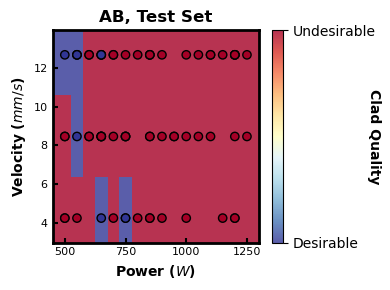

In [95]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


ABC = AdaBoostClassifier(n_estimators=577, learning_rate=0.02,
                         estimator=DecisionTreeClassifier(max_depth=2), random_state=42).fit(x_test.iloc[:,:2], y_test)
W = ABC.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('AB, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Gradient Boosting Classifier**

In [ ]:
# Gradient Boosting clf
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features='auto', max_depth=10, min_samples_split=2, min_samples_leaf=2, subsample=1, random_state=42)

# specify parameters and distributions to sample from
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


param_dist = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'max_features': max_features,
    'max_depth': max_depth,
    'subsample': uniform(0.1, 0.9),
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    GBC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_cl, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.938


The 5-fold cross-validation accuracy score for this classifier is 0.843


the classifier AUC score is 0.854

              precision    recall  f1-score   support

   Desirable       0.78      0.78      0.78         9
 Undesirable       0.96      0.96      0.96        56

   micro avg       0.94      0.94      0.94        65
   macro avg       0.87      0.87      0.87        65
weighted avg       0.94      0.94      0.94        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

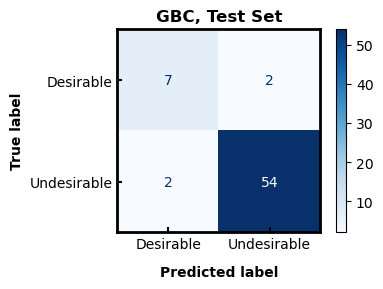

In [96]:
# Create a Decision Tree classifier and train it on 80% of the data set.
GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features='log2', max_depth=2, subsample=0.48, random_state=42)
GBC.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = GBC.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

GBC_pipe = make_pipeline(SelectKBest(f_classif, k=3),GBC)
scores = cross_val_score(GBC_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
GBC_accuracy = np.average(cross_val_score(GBC, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, GBC_accuracy))

y_pred_GBC = GBC.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
gb_y_pred_proba = cross_val_predict(GBC, X_crossval, y_cl, cv=5, method='predict_proba')
gb_auc_score = roc_auc_score(y_cl, gb_y_pred_proba[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_cl, gb_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(gb_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_GBC, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_GBC, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('GBC, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


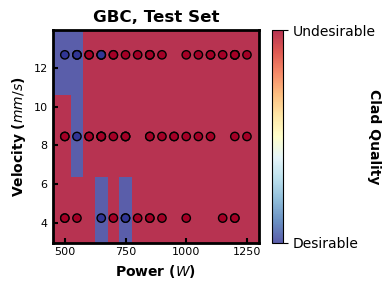

In [97]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features='log2',
                                 max_depth=2, subsample=0.48, random_state=42).fit(x_test.iloc[:,:2], y_test)
W = GBC.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('GBC, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Support Vector Classifier**

In [ ]:
# Support Vector clf
SVC = SVC(kernel='linear', C=1.0, random_state=42)

# specify parameters and distributions to sample from
C = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': C,
    'gamma': ['scale', 'auto', 0.1, 1.0, 10.0],
    'degree': randint(2, 5),
    'coef0': uniform(-1.0, 2.0)
    }

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(
    SVC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_cl, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.954


The 5-fold cross-validation accuracy score for this classifier is 0.883


the classifier AUC score is 0.906

              precision    recall  f1-score   support

   Desirable       0.88      0.78      0.82         9
 Undesirable       0.96      0.98      0.97        56

   micro avg       0.95      0.95      0.95        65
   macro avg       0.92      0.88      0.90        65
weighted avg       0.95      0.95      0.95        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

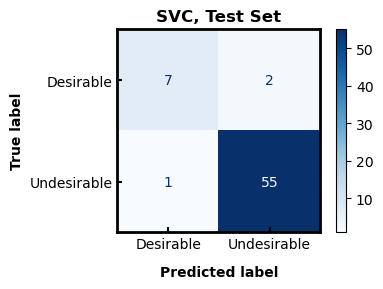

In [98]:
# Create a Support Vector classifier and train it on 80% of the data set.
SVCc = SVC(kernel='rbf', C=470, degree=3, gamma= 1.0, probability=True, random_state=42)
SVCc.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = SVCc.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

SVCc_pipe = make_pipeline(SelectKBest(f_classif, k=3),SVCc)
scores = cross_val_score(SVCc_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
SVCc_accuracy = np.average(cross_val_score(SVCc, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, SVCc_accuracy))

y_pred_SVCc = SVCc.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
svc_y_pred_proba = cross_val_predict(SVCc, X_crossval, y_cl, cv=5, method='predict_proba')
svc_auc_score = roc_auc_score(y_cl, svc_y_pred_proba[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_cl, svc_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(svc_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_SVCc, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_SVCc, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('SVC, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


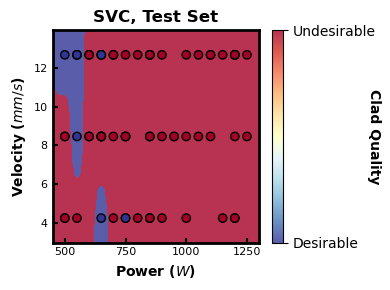

In [99]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


SVCc = SVC(kernel='rbf', C=470, degree=3, gamma= 0.00199, random_state=42).fit(x_test.iloc[:,:2], y_test)
W = SVCc.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('SVC, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Gaussian Process Classifier**

In [ ]:
# Gaussian Process clf

GPC = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', random_state=42)

# specify parameters and distributions to sample from

param_dist = {
    'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * Matern(length_scale=1.0, nu=0.5), WhiteKernel()],
    'optimizer': ['fmin_l_bfgs_b', 'BFGS', 'CG'],
    'n_restarts_optimizer': [0, 5, 10]
}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(
    GPC, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_total_sc, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.923


The 5-fold cross-validation accuracy score for this classifier is 0.907


the classifier AUC score is 0.928

              precision    recall  f1-score   support

   Desirable       0.70      0.78      0.74         9
 Undesirable       0.96      0.95      0.95        56

   micro avg       0.92      0.92      0.92        65
   macro avg       0.83      0.86      0.85        65
weighted avg       0.93      0.92      0.92        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

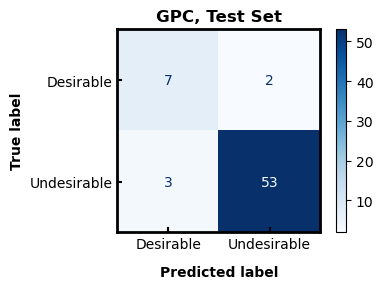

In [100]:
# Create a Gaussian Process classifier and train it on 80% of the data set.
GPC = GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=1, nu=0.5), optimizer='fmin_l_bfgs_b', n_restarts_optimizer= 5, random_state=42)
GPC.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = GPC.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

GPC_pipe = make_pipeline(SelectKBest(f_classif, k=3),GPC)
scores = cross_val_score(GPC_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
GPC_accuracy = np.average(cross_val_score(GPC, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, GPC_accuracy))

y_pred_GPC = GPC.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
gp_y_pred_proba = cross_val_predict(GPC, X_crossval, y_cl, cv=5, method='predict_proba')
gp_auc_score = roc_auc_score(y_cl, gp_y_pred_proba[:,1])
gp_fpr, gp_tpr, gp_thresholds = roc_curve(y_cl, gp_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(gp_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_GPC, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_GPC, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('GPC, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(


UNIQUE ['Desirable' 'Undesirable']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


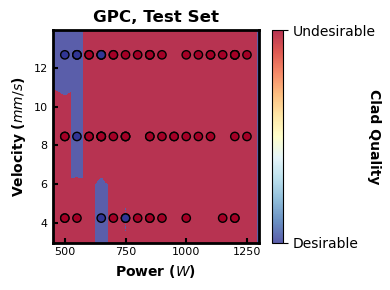

In [101]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


GPC = GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=0.04, nu=0.2), optimizer=None,
                                n_restarts_optimizer= 5, random_state=42).fit(x_test.iloc[:,:2], y_test)
W = GPC.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('GPC, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **K-Nearest Neighbors Classifier**

In [ ]:
# K-Nearest Neighbors clf
KNNc = KNeighborsClassifier(n_neighbors=5)

# specify parameters and distributions to sample from

param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    KNNc, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_total_sc, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.923


The 5-fold cross-validation accuracy score for this classifier is 0.923


the classifier AUC score is 0.938

              precision    recall  f1-score   support

   Desirable       0.83      0.56      0.67         9
 Undesirable       0.93      0.98      0.96        56

   micro avg       0.92      0.92      0.92        65
   macro avg       0.88      0.77      0.81        65
weighted avg       0.92      0.92      0.92        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

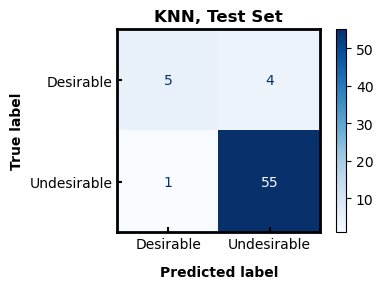

In [102]:
# Create KNN classifier and train it on 80% of the data set.
KNNc = KNeighborsClassifier(algorithm='brute', n_neighbors=15, p=2, weights='distance')
KNNc.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = KNNc.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

KNNc_pipe = make_pipeline(SelectKBest(f_classif, k=3),KNNc)
scores = cross_val_score(KNNc_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
KNNc_accuracy = np.average(cross_val_score(KNNc, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, KNNc_accuracy))

y_pred_KNNc = KNNc.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
knn_y_pred_proba = cross_val_predict(KNNc, X_crossval, y_cl, cv=5, method='predict_proba')
knn_auc_score = roc_auc_score(y_cl, knn_y_pred_proba[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_cl, knn_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(knn_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_KNNc, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_KNNc, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('KNN, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


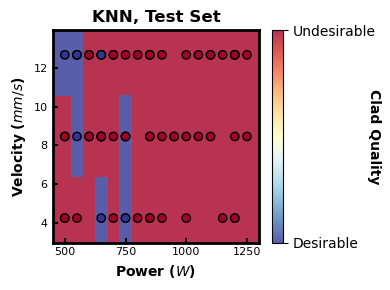

In [103]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


KNNc = KNeighborsClassifier(algorithm='brute',
                            n_neighbors=2, p=2, weights='distance').fit(x_test.iloc[:,:2], y_test)
W = KNNc.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('KNN, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Gaussian Naive Bayes Classifier**

In [ ]:
# Gaussian Naive Bayes clf
GNB = GaussianNB()

# specify parameters and distributions to sample from

param_dist = {
    'var_smoothing': loguniform(1e-10, 1e-3)
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    GNB, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_total_sc, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.892


The 5-fold cross-validation accuracy score for this classifier is 0.907


the classifier AUC score is 0.919

              precision    recall  f1-score   support

   Desirable       0.62      0.56      0.59         9
 Undesirable       0.93      0.95      0.94        56

   micro avg       0.89      0.89      0.89        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.89      0.89      0.89        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

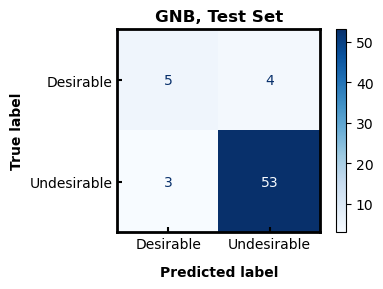

In [104]:
# Create GaussianNB classifier and train it on 80% of the data set.
GNB = GaussianNB(var_smoothing=0.0004)
GNB.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = GNB.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

GNB_pipe = make_pipeline(SelectKBest(f_classif, k=3),GNB)
scores = cross_val_score(GNB_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
GNB_accuracy = np.average(cross_val_score(GNB, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, GNB_accuracy))

y_pred_GNB = GNB.fit(X_train_sc, y_train).predict(X_test_sc)

######### calculate the AUC value
gnb_y_pred_proba = cross_val_predict(GNB, X_crossval, y_cl, cv=5, method='predict_proba')
gnb_auc_score = roc_auc_score(y_cl, gnb_y_pred_proba[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_cl, gnb_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(gnb_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_GNB, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_GNB, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('GNB, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


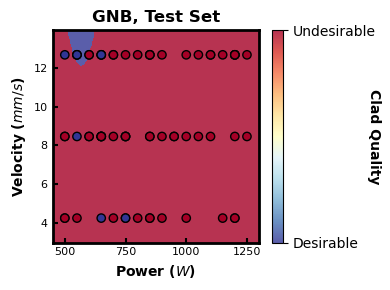

In [105]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


GNB = GaussianNB(var_smoothing=1e-10).fit(x_test.iloc[:,:2], y_test)
W = GNB.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('GNB, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Logistic Regression**

In [ ]:
# logistic regression clf
LR = LogisticRegression(penalty='l2', C=1, solver='lbfgs', random_state=42)

# specify parameters and distributions to sample from
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(1e-5, 10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    LR, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_total_sc, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.908


The 5-fold cross-validation accuracy score for this classifier is 0.920


the classifier AUC score is 0.945

              precision    recall  f1-score   support

   Desirable       0.80      0.44      0.57         9
 Undesirable       0.92      0.98      0.95        56

   micro avg       0.91      0.91      0.91        65
   macro avg       0.86      0.71      0.76        65
weighted avg       0.90      0.91      0.90        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

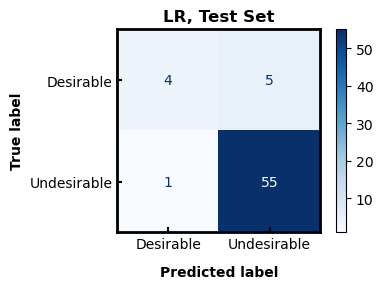

In [106]:
# Create GaussianNB classifier and train it on 80% of the data set.
LR = LogisticRegression(penalty='l2', C=4, solver='lbfgs', random_state=42)
LR.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = LR.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

LR_pipe = make_pipeline(SelectKBest(f_classif, k=3),LR)
scores = cross_val_score(LR_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
LR_accuracy = np.average(cross_val_score(LR, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, LR_accuracy))

y_pred_LR = LR.fit(X_train_sc, y_train).predict(X_test_sc)


######### calculate the AUC value
lr_y_pred_proba = cross_val_predict(LR, X_crossval, y_cl, cv=5, method='predict_proba')
lr_auc_score = roc_auc_score(y_cl, lr_y_pred_proba[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_cl, lr_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(lr_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_LR, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_LR, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('LR, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

UNIQUE ['Desirable' 'Undesirable']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


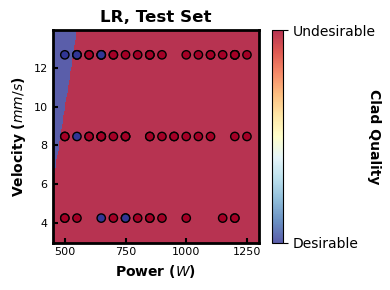

In [107]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


LR = LogisticRegression(penalty='l2', C=5, solver='lbfgs', random_state=42).fit(x_test.iloc[:,:2], y_test)
W = LR.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('LR, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **MLP Classifier**

In [ ]:
# logistic regression clf
MLP = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)

# specify parameters and distributions to sample from
param_dist = {
    'hidden_layer_sizes': [(128), (128, 64), (128, 64, 32), (256, 128, 64, 32)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': randint(100, 1000)
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    MLP, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X_total_sc, y_cl)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


The classifier accuracy score is 0.923


The 5-fold cross-validation accuracy score for this classifier is 0.929


the classifier AUC score is 0.946

              precision    recall  f1-score   support

   Desirable       0.83      0.56      0.67         9
 Undesirable       0.93      0.98      0.96        56

   micro avg       0.92      0.92      0.92        65
   macro avg       0.88      0.77      0.81        65
weighted avg       0.92      0.92      0.92        65



/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mas

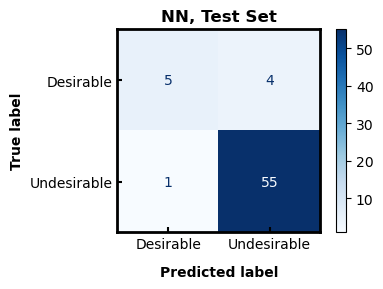

In [108]:
# Create GaussianNB classifier and train it on 80% of the data set.
MLP = MLPClassifier(hidden_layer_sizes=(256,128, 64, 32), activation='identity',
                    solver='sgd', alpha=0.001, max_iter = 20000, random_state=42)
MLP.fit(X_train_sc,y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = MLP.score(X_test_sc, y_test)
print('\nThe classifier accuracy score is {:03.3f}\n'.format(classifier_score))

MLP_pipe = make_pipeline(SelectKBest(f_classif, k=3),MLP)
scores = cross_val_score(MLP_pipe, X_crossval, y_cl, cv=2)

# Get average of 5-fold cross-validation score
n_folds = 5
MLP_accuracy = np.average(cross_val_score(MLP, X_crossval, y_cl, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.3f}\n'.format(n_folds, MLP_accuracy))

y_pred_MLP = MLP.fit(X_train_sc, y_train).predict(X_test_sc)


######### calculate the AUC value
nn_y_pred_proba = cross_val_predict(MLP, X_crossval, y_cl, cv=5, method='predict_proba')
nn_auc_score = roc_auc_score(y_cl, nn_y_pred_proba[:,1])
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_cl, nn_y_pred_proba[:,1])
print('\nthe classifier AUC score is {:03.3f}\n'.format(nn_auc_score))
#########


target_names = ['Desirable', 'Undesirable']
labels_names = ['0', '1']
print(classification_report(y_test, y_pred_MLP, labels=labels_names, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_MLP, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)


from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


ax.set_xlabel('Predicted Label', weight='bold', labelpad=10)
ax.set_ylabel('True Label', weight='bold' )
ax.set_title('NN, Test Set', weight='bold')
plt.tight_layout()
disp.plot(ax=ax, cmap=plt.cm.Blues)

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


UNIQUE ['Desirable' 'Undesirable']
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


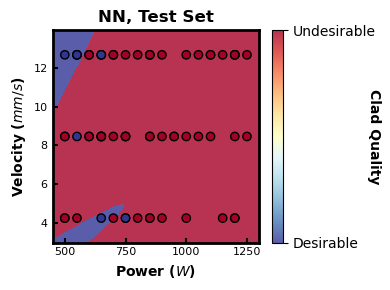

In [109]:
from matplotlib.pyplot import pcolormesh
fig, ax = plt.subplots(figsize=(4,3), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

nx = 300
ny = 300

xs = np.linspace(0.9*np.min(x_test.iloc[:,0]), 1.04*np.max(x_test.iloc[:,0]), nx)
ys = np.linspace(0.7*np.min(x_test.iloc[:,1]), 1.1*np.max(x_test.iloc[:,1]), ny)
xx, yy = np.meshgrid(xs, ys)


MLP = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='logistic',
                    solver='lbfgs', alpha=0.021, max_iter = 20000, random_state=42).fit(x_test.iloc[:,:2], y_test)
W = MLP.predict(np.c_[xx.ravel(), yy.ravel()])

z = W
z = z.reshape(xx.shape)

ax = plt.subplot(111)
cmap = ListedColormap([ 'royalblue', 'lightgray'])

plt.pcolormesh(xx, yy, z, cmap = plt.cm.RdYlBu_r, alpha=0.8)

cbar = plt.colorbar()
strings= target_names
print("UNIQUE", np.unique(target_names))
cbar.set_ticks(np.arange(len(np.unique(target_names))))
cbar.set_ticklabels(strings)
cbar.ax.set_ylabel('Clad Quality', rotation = 270, weight='bold')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

print(z)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylabel(r'Velocity ($mm/s$)', weight='bold')
plt.xlabel(r'Power ($W$)', weight='bold')
plt.title('NN, Test Set', weight='bold')
plt.tight_layout()

ax.scatter(x_test.iloc[:,0], x_test.iloc[:, 1], c = y_test, edgecolor = 'k', cmap= plt.cm.RdYlBu_r)
plt.tight_layout()
plt.show()


## **Overall Classifier Comparison**

In [110]:
Dict_acc = {"Model": ["Neural Network Classifier", "KNeighbors Classifier", "Gaussian Process Classifier","Logistic Regression",
                        "Gaussian Naive Bayes", "Support Vector Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier",
                        "Random Forest Classifier", "Decision Tree Classifier"],
              "Cross Validation Accuracy": [MLP_accuracy, KNNc_accuracy, GPC_accuracy, LR_accuracy, GNB_accuracy, SVCc_accuracy,
                                            GBC_accuracy, ABC_accuracy, RFC_accuracy, DTC_accuracy],
            "AUC": [nn_auc_score, knn_auc_score, gp_auc_score, lr_auc_score, gnb_auc_score, svc_auc_score,
                          gb_auc_score, ab_auc_score, rf_auc_score, dt_auc_score]
              }
              
acc_clf = pd.DataFrame(Dict_acc)
acc_clf

Model  Cross Validation Accuracy       AUC
0     Neural Network Classifier                   0.929038  0.945943
1         KNeighbors Classifier                   0.922885  0.937830
2   Gaussian Process Classifier                   0.907452  0.928195
3           Logistic Regression                   0.919760  0.944828
4          Gaussian Naive Bayes                   0.907404  0.919473
5     Support Vector Classifier                   0.882933  0.906085
6  Gradient Boosting Classifier                   0.842933  0.853702
7           AdaBoost Classifier                   0.805865  0.800710
8      Random Forest Classifier                   0.895096  0.885598
9      Decision Tree Classifier                   0.888942  0.691278

### **Classification Accuracy**

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2113/3205415527.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


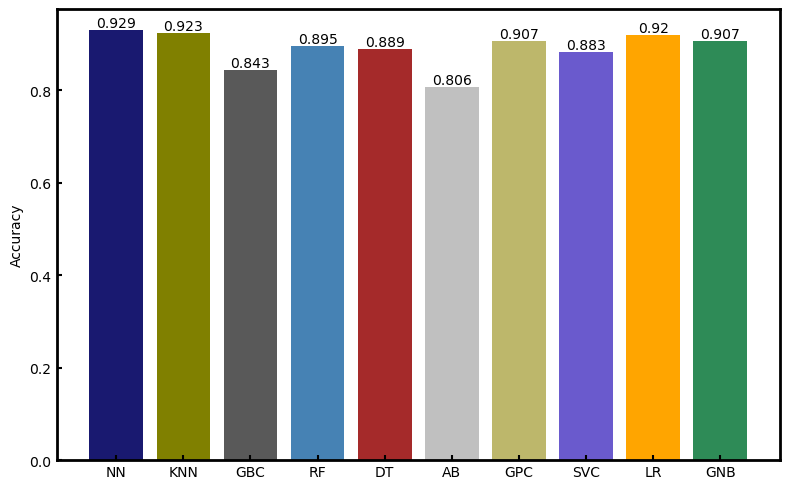

In [111]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBC","RF", "DT", "AB", "GPC", "SVC", "LR", "GNB")
R2 = (0.929, 0.923, 0.843, 0.895, 0.889, 0.806, 0.907, 0.883, 0.920, 0.907)
x_pos = np.arange(len(models))

ax.bar(models, R2, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('Accuracy')
# ax.set_title('Classification, Test Set Accuracy')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

/var/folders/6q/mv1t578n5dd41214yd5lkclh0000gn/T/ipykernel_2113/1246187634.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models)


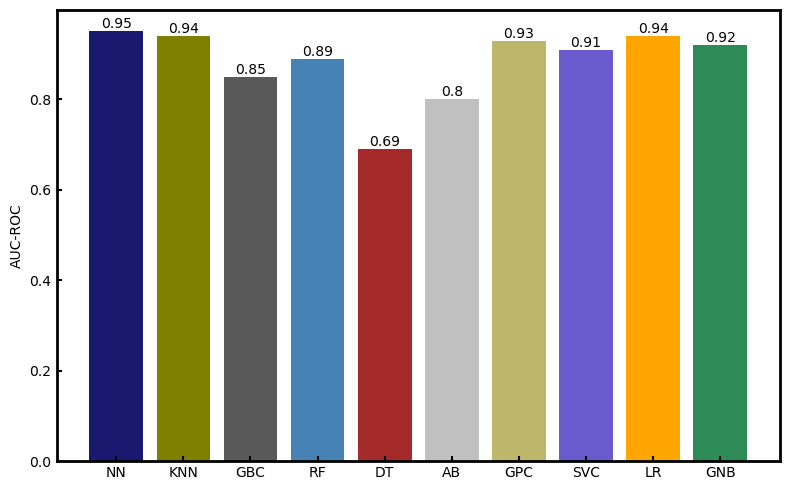

In [112]:
fig = plt.figure(figsize = (8,5), dpi = 100)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


models = ("NN", "KNN", "GBC","RF", "DT", "AB", "GPC", "SVC", "LR", "GNB")
AUC = (.95, 0.94, 0.85, 0.89, 0.69, 0.80, 0.93, 0.91, 0.94, 0.92)
x_pos = np.arange(len(models))

ax.bar(models, AUC, width, color=['midnightblue', 'olive', '0.35', 'steelblue', 'brown', 'silver', 'darkkhaki', 'slateblue', 'orange', 'seagreen', 'peru'])

ax.set_ylabel('AUC-ROC')
# ax.set_title('Classification, AUC-ROC')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(models)
plt.yticks()

fig.tight_layout()
plt.show()

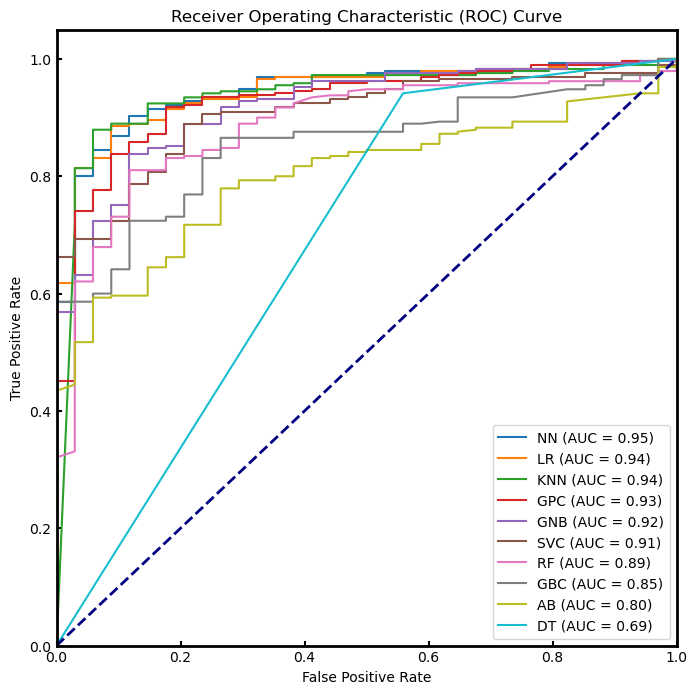

In [113]:
# Plot the ROC curves for the three models
fig = plt.figure(figsize = (8,8), dpi = 100)
widths = 2
width = 0.6  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)


#plt.figure(figsize=(14, 14), dpi=200)

ax.plot(nn_fpr, nn_tpr, label='NN (AUC = %0.2f)' % nn_auc_score)
ax.plot(lr_fpr, lr_tpr, label='LR (AUC = %0.2f)' % lr_auc_score)
ax.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc_score)
ax.plot(gp_fpr, gp_tpr, label='GPC (AUC = %0.2f)' % gp_auc_score)
ax.plot(gnb_fpr, gnb_tpr, label='GNB (AUC = %0.2f)' % gnb_auc_score)
ax.plot(svc_fpr, svc_tpr, label='SVC (AUC = %0.2f)' % svc_auc_score)
ax.plot(rf_fpr, rf_tpr, label='RF (AUC = %0.2f)' % rf_auc_score)
ax.plot(gb_fpr, gb_tpr, label='GBC (AUC = %0.2f)' % gb_auc_score)
ax.plot(ab_fpr, ab_tpr, label='AB (AUC = %0.2f)' % ab_auc_score)
ax.plot(dt_fpr, dt_tpr, label='DT (AUC = %0.2f)' % dt_auc_score)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")
plt.show()